
# Projet 5 :  Segmentez des clients d'un site e-commerce
<font color = "grey"><i> Chargement des modules necessaires </i></font>



In [1]:

import numpy

from IPython.core.display import display

from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import main
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler



## Sommaire
<h1><a href='#data_gen'>I.1) Présentation générale</a></h1>
    <h2><a href='#data_size'>I.2) Taille des jeux de données </a></h2>
        <h3><a href='#data_size_customers'>I.2.1) Dataset Customers</a></h3>
        <h3><a href='#data_size_olist_geolocation'>I.2.2)Dataset olist_geolocation</a></h3>
        <h3><a href='#data_size_olist_order_payments'>I.2.3)Dataset olist_order_payments</a></h3>
        <h3><a href='#data_size_olist_order_items'>I.2.4)Dataset olist_order_items</a></h3>
        <h3><a href='#data_size_olist_order_reviews'>I.2.5)Dataset olist_order_reviews</a></h3>
        <h3><a href='#data_size_olist_orders'>I.2.6)Dataset olist_orders</a></h3>
        <h3><a href='#data_size_olist_sellers'>I.2.7)Dataset olist_sellers</a></h3>
        <h3><a href='#data_size_product_category_name_translation'>I.2.8)Dataset product_category_name_translation</a></h3>
<h1><a href='#data_new'>II) Jointure </a></h1>
    <h2><a href='#data_size'>I.1) MCD </a></h2>
    <h2><a href='#data_size'>I.2) nouveau dataset </a></h2>
    <h2><a href='#data_size'>I.3) Nettoyage </a></h2>

<h1><a href='#analy_uni'>II) Analyse Univariée</a></h1>
    <h2><a href='#analyse'>II.1.A)Analyse des variables</a></h2>
        <h3><a href='#ansaly_imp'>II.1.A)Analyse des variables quantitatives</a></h3>
    <h2><a href='#analy_qua'>II.1.B)Analyse des variables qualitatives</a></h2>


    <h2><a href='#analy_qua'>II.1.B)Nouvelle caractéristique</a></h2>



<h1><a href='#analy_multy'>III) Analyse Multivarié</a></h1>
    <h2><a href='#analy_correl'>III.1) Corrélations</a></h2>
    <h2><a href='#analy_Factoring'>III.2) Factorisation</a></h2>

<h1><a href='#feature'>IV) Feature engineering</a></h1>

<h1><a href='#score'> V) Modèles de scoring des clients</a></h1>

In [2]:


plt.style.use('ggplot')

Légende:

><font color = "grey"><i> Je suis une petite indication </i></font>

><font color = "cyan"><i> Je suis une indication </i></font>

><font color = "green"><i> Je suis un commentaire </i></font>

<font color = "grey"><i> Chargement des jeux de données </i></font>

In [3]:
df_customer = pd.read_csv("data/olist_customers_dataset.csv")
df_geoloc = pd.read_csv("data/olist_geolocation_dataset.csv")
df_order_payments = pd.read_csv("data/olist_order_payments_dataset.csv")
df_order_items = pd.read_csv("data/olist_order_items_dataset.csv")
df_order_reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("data/olist_orders_dataset.csv")
df_products = pd.read_csv("data/olist_products_dataset.csv")
df_sellers = pd.read_csv("data/olist_sellers_dataset.csv")
df_categ_name_transl = pd.read_csv("data/product_category_name_translation.csv")#%%

<font color = "grey"><i> Chargement des jeux de données </i></font>

In [4]:
colors = sns.color_palette("colorblind", 14)

<font color = "grey"><i> Fonction describe_data[col] </i></font>

In [5]:
def descrbibe_data(data, col):
    data_des = data.describe()
    df1 = pd.DataFrame([('Skewness', data_des[col].skew()), ('Kurtosis', data_des[col].kurt())],
                       columns=('Caractéristiques', 'Valeurs'))
    df_ser = pd.DataFrame({'Caractéristiques': data_des[col].index,
                           'Valeurs': data_des[col].values
                           })

    df_ser = df_ser.append(df1, ignore_index=True)
    sns.set_style("whitegrid")
    ax = sns.boxplot(x=data[col], palette=colors)


    plt.figure(figsize=(9, 8))
    sns.distplot(data[col], color='blue', kde=True)
    plt.title(f'Distribution de {col}')
    plt.ylabel("Fréquence de la donnée")
    plt.grid()
    plt.show()

    return df_ser.style.set_caption(f'Caractéristiques {col}')

In [6]:
def get_type_and_missing_data(data):
    df = data
    unsorted_df = pd.DataFrame({'colonne': df.dtypes.index,
                            'Types': df.dtypes.values,
                            'Effectif manquant': df.isna().sum().values,
                            'Effectif manquant %': ((df.isna().sum(axis=0) / df.shape[0]) * 100).astype(
                                float).values})
    return unsorted_df
 

In [7]:
def show_diag( data, col, titre_col):
    sns.set_style("whitegrid")
    percentage = lambda i: len(i) / float(len(data[col])) * 100
    plt.figure(figsize=(30, 20))
    #plt.subplot(8,10,1)
    fig, ax = plt.subplots(1, 2,figsize=(15, 6))

    ax1= sns.countplot(x=col, data=data,
                  order=data[col].value_counts().index , hue = col, palette = "colorblind", ax=ax[0])
    ax1.set_title(f'Distribution de {col}')
    ax1.set_ylabel(f'Fréquence de {col}')
    ax1.set_xlabel(f'Valeurs de la {col}')
    ax1.legend(title = titre_col)

    #plt.subplot(8,10,2)

    #plt.subplot(8,10,2)
    ax2 = sns.barplot(x=data[col].value_counts().index,
                      y=data[col].value_counts() ,

                  hue = col, palette = "colorblind",estimator=percentage,ax=ax[1])
    ax2.set_title(f'Distribution de {col}')
    ax2.set_ylabel(f'Pourcentage de {col}')
    ax2.set_xlabel(f'Valeurs de la {col}')
    ax2.legend(title = titre_col)

    for bar in ax2.patches:
        plt.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=15, xytext=(0, 8),
                       textcoords='offset points')


    plt.show()

    return

In [8]:
def describe_dataset (data,name):
    df =data
    print(f"Le jeu de données olist_customers est composé de", df.shape[1], "colonnes et ",
          df.shape[0], " lignes et ", df.duplicated(df.columns[0:]).sum(), "doublon(s)")

    presentation_df = pd.DataFrame({'colonne': df.dtypes.index,
                                    'Types': df.dtypes.values,

                                    'Effectif manquant %': ((df.isna().sum(axis=0) / df.shape[0]) * 100).astype(
                                        float).values}).style.set_caption(
        f"Valeurs manquantes et leurs types du Dataset {name}")
    return presentation_df

In [9]:
def categorical_distribution(dataframe, feature, ordinal=False):
    """Function plotting the bar-plot and pie-plot (as subplots) for
    a distribution of categorical features."""



    # filtering non-null data for the feature
    mask = dataframe[feature].notnull()
    data_view = dataframe[mask]

    # Setting the data to plot
    x=data_view[feature]

    # Set frequencies and labels, sorting by index
    if ordinal==True:
        labels = list(x.value_counts().sort_index().index.astype(str))
        frequencies = x.value_counts().sort_index()
    else:
        labels = list(x.value_counts().sort_values(ascending=False).index.astype(str))
        frequencies = x.value_counts().sort_values(ascending=False)

    # Graphical properties of the main figure
    fig = plt.figure(figsize=(14, 6))

    plt.suptitle("Empiric statistical distribution: " + feature, fontsize=25)

    # Main graphical properties of the first subplot (histogram)
    ax1 = plt.subplot(121)
    ax1.set_xlabel("Values", fontsize=20)
    ax1.set_ylabel("Frequencies", fontsize=20)
    ax1.set_xticklabels(labels, rotation='45', horizontalalignment="right")

    # Main graphical properties of the second subplot (pieplot)
    ax2 = plt.subplot(122)
    ax2.set_xlabel("Relative frequencies", fontsize=20)

    # plotting the plots
    ax1.bar(labels, frequencies)
    ax2.pie(frequencies,
            autopct='%1.2f%%',
            shadow=True,
              )

    ax2.legend(labels)
    #plt.show()


<a id='data_gen'></a>
# I.1) Présentation générale

<a id='data_size_customers'></a>
### I.2.1) Dataset Customers

<font color = "cyan"><i>  Valeurs manquantes et leurs types  du dataset customers</i></font>

In [10]:
describe_dataset(df_customer,"df_customer")


Le jeu de données olist_customers est composé de 5 colonnes et  99441  lignes et  0 doublon(s)


,colonne,Types,Effectif manquant %
0,customer_id,object,0.000000
1,customer_unique_id,object,0.000000
2,customer_zip_code_prefix,int64,0.000000
3,customer_city,object,0.000000
4,customer_state,object,0.000000


<font color = "cyan"><i> Apercu des permières lignes et colonnes  du dataset customers</i></font>


In [11]:
df_customer.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


<a id='data_size_olist_geolocation'></a>
### I.2.2) Dataset olist_geolocation

<font color = "cyan"><i>  Valeurs manquantes et leurs types  du dataset olist_geolocation</i></font>

In [12]:

describe_dataset(df_geoloc,"df_geoloc")

Le jeu de données olist_customers est composé de 5 colonnes et  1000163  lignes et  261831 doublon(s)


,colonne,Types,Effectif manquant %
0,geolocation_zip_code_prefix,int64,0.000000
1,geolocation_lat,float64,0.000000
2,geolocation_lng,float64,0.000000
3,geolocation_city,object,0.000000
4,geolocation_state,object,0.000000


<font color = "cyan"><i> Apercu des permières lignes et colonnes  du dataset olist_geolocation</i></font>

In [13]:
df_geoloc.head()


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


<a id='data_size_olist_order_payments'></a>
### I.2.3) Dataset olist_order_payments

<font color = "cyan"><i>  Valeurs manquantes et leurs types  du dataset olist_order_payments</i></font>

In [14]:
describe_dataset(df_order_payments,"df_order_payments")

Le jeu de données olist_customers est composé de 5 colonnes et  103886  lignes et  0 doublon(s)


,colonne,Types,Effectif manquant %
0,order_id,object,0.000000
1,payment_sequential,int64,0.000000
2,payment_type,object,0.000000
3,payment_installments,int64,0.000000
4,payment_value,float64,0.000000


<font color = "cyan"><i> Apercu des permières lignes et colonnes  du dataset olist_order_payments</i></font>

In [15]:
df_order_payments.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


<a id='data_size_olist_order_items'></a>
### I.2.4) Dataset olist_order_items

<font color = "cyan"><i>  Valeurs manquantes et leurs types  du dataset olist_order_items</i></font>

In [16]:
describe_dataset(df_order_items,"df_order_items")

Le jeu de données olist_customers est composé de 7 colonnes et  112650  lignes et  0 doublon(s)


,colonne,Types,Effectif manquant %
0,order_id,object,0.000000
1,order_item_id,int64,0.000000
2,product_id,object,0.000000
3,seller_id,object,0.000000
4,shipping_limit_date,object,0.000000
5,price,float64,0.000000
6,freight_value,float64,0.000000


<font color = "cyan"><i> Apercu des permières lignes et colonnes  du dataset df_order_items</i></font>

In [17]:
df_order_items.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<a id='data_size_olist_order_reviews'></a>
### I.2.5) Dataset olist_order_reviews

<font color = "cyan"><i>  Valeurs manquantes et leurs types  du dataset olist_order_reviews</i></font>

In [18]:
describe_dataset(df_order_reviews,"df_order_reviews")

Le jeu de données olist_customers est composé de 7 colonnes et  100000  lignes et  0 doublon(s)


,colonne,Types,Effectif manquant %
0,review_id,object,0.000000
1,order_id,object,0.000000
2,review_score,int64,0.000000
3,review_comment_title,object,88.285000
4,review_comment_message,object,58.247000
5,review_creation_date,object,0.000000
6,review_answer_timestamp,object,0.000000


<font color = "cyan"><i> Apercu des permières lignes et colonnes  du dataset olist_order_reviews</i></font>

In [19]:
df_order_reviews.head()


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


<a id='data_size_olist_orders'></a>
### I.2.6) Dataset olist_orders

<font color = "cyan"><i>  Valeurs manquantes et leurs types  du dataset olist_orders</i></font>

In [20]:
df = df_orders

df_orders["order_purchase_timestamp"] = pd.to_datetime(df_orders["order_purchase_timestamp"], errors='coerce')
last_order = df_orders['order_purchase_timestamp'].max()
print("Date dernière commande", last_order)
df_orders['recency'] = last_order - df_orders['order_purchase_timestamp']
describe_dataset(df_orders,"df_orders")

Date dernière commande 2018-10-17 17:30:18
Le jeu de données olist_customers est composé de 9 colonnes et  99441  lignes et  0 doublon(s)


,colonne,Types,Effectif manquant %
0,order_id,object,0.000000
1,customer_id,object,0.000000
2,order_status,object,0.000000
3,order_purchase_timestamp,datetime64[ns],0.000000
4,order_approved_at,object,0.160899
5,order_delivered_carrier_date,object,1.793023
6,order_delivered_customer_date,object,2.981668
7,order_estimated_delivery_date,object,0.000000
8,recency,timedelta64[ns],0.000000


<font color = "green"><i> on soustrait la date de l'achat au dernier achat effectué sur le site  et on divise par 86400 pour avoir la valeur jour</i></font>

In [21]:
df_orders['recency'] = df_orders['recency'].dt.total_seconds() // 86400

In [22]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,recency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,380.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,84.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,70.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,332.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,245.0


<font color = "cyan"><i> Apercu des permières lignes et colonnes  du dataset olist_orders</i></font>

In [23]:
df_orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,recency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,380.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,84.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,70.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,332.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,245.0


<a id='data_size_olist_products'></a>
### I.2.7) Dataset olist_products

<font color = "cyan"><i>  Valeurs manquantes et leurs types  du dataset olist_products</i></font>

In [24]:
describe_dataset(df_products,"df_products")

Le jeu de données olist_customers est composé de 9 colonnes et  32951  lignes et  0 doublon(s)


,colonne,Types,Effectif manquant %
0,product_id,object,0.000000
1,product_category_name,object,1.851234
2,product_name_lenght,float64,1.851234
3,product_description_lenght,float64,1.851234
4,product_photos_qty,float64,1.851234
5,product_weight_g,float64,0.006070
6,product_length_cm,float64,0.006070
7,product_height_cm,float64,0.006070
8,product_width_cm,float64,0.006070


<font color = "cyan"><i> Apercu des permières lignes et colonnes  du dataset olist_products</i></font>

In [25]:
df_products.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


<a id='data_size_olist_sellers'></a>
### I.2.7) Dataset olist_sellers

<font color = "cyan"><i>  Valeurs manquantes et leurs types  du dataset olist_sellers</i></font>

In [26]:
describe_dataset(df_sellers,"df_sellers")

Le jeu de données olist_customers est composé de 4 colonnes et  3095  lignes et  0 doublon(s)


,colonne,Types,Effectif manquant %
0,seller_id,object,0.000000
1,seller_zip_code_prefix,int64,0.000000
2,seller_city,object,0.000000
3,seller_state,object,0.000000


<font color = "cyan"><i> Apercu des permières lignes et colonnes  du dataset olist_sellers</i></font>

In [27]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


<a id='data_size_product_category_name_translation'></a>
### I.2.8) Dataset product_category_name_translation

<font color = "cyan"><i>  Valeurs manquantes et leurs types  du dataset product_category_name_translation</i></font>

In [28]:
describe_dataset(df_categ_name_transl,"df_categ_name_transl")

Le jeu de données olist_customers est composé de 2 colonnes et  71  lignes et  0 doublon(s)


,colonne,Types,Effectif manquant %
0,product_category_name,object,0.000000
1,product_category_name_english,object,0.000000


<font color = "cyan"><i> Apercu des permières lignes et colonnes  du dataset product_category_name_translation</i></font>

In [29]:
df_categ_name_transl.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


<a id='data_new'> </a>
## II) Jointure

<a id='data_'> </a>
### II.1) MCD

![mpd](mpd.png)


#### *Inspection des variables 'customer_id' et 'customer_unique_id'*

In [30]:
# Getting the maximum number of 'customer_unique_id'
# associated to a single 'customer_id'
df_customer.groupby(by='customer_id')['customer_unique_id']\
    .nunique()\
    .max()

1

In [31]:
# Getting the maximum number of 'customer_id'
# associated to a single 'customer_unique_id'
df_customer.groupby(by='customer_unique_id')['customer_id']\
    .nunique()\
    .max()

17

<font color = "cyan"><i> L'identifiant unique 'customer_unique_id' semble plus spécifique.
Cela signifie que plusieurs *'customer_id'* peuvent être rattachés à un même *'customer_unique_id'*.</i></font>

<a id='data_'> </a>
### II.2) Nouveau dataset

<font color = "cyan"><i> liaison de customer et orders</i></font>



In [32]:
data = pd.merge(df_customer, df_orders, on='customer_id', how="left")
print(len(data['customer_unique_id'].unique()))
print(f"Le jeu de données est composé de", data.shape[1], "colonnes et ",
          data.shape[0], " lignes et de  ",len(data['customer_unique_id'].unique()),'customer_unique_id',data.duplicated(data.columns[0:]).sum(), "doublon(s)")
data

96096
Le jeu de données est composé de 13 colonnes et  99441  lignes et de   96096 customer_unique_id 0 doublon(s)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,recency
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,519.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,277.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,151.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,218.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,193.0
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,196.0
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,191.0
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,347.0


<font color = "cyan"><i> liaison de orders et payments </i></font>


In [33]:
data = pd.merge(data, df_order_payments, on='order_id', how="left")  # inner join
print(f"Le jeu de données est composé de", data.shape[1], "colonnes et ",
          data.shape[0], " lignes et de  ",len(data['customer_unique_id'].unique()),'customer_unique_id',data.duplicated(data.columns[0:]).sum(), "doublon(s)")
data

Le jeu de données est composé de 17 colonnes et  103887  lignes et de   96096 customer_unique_id 0 doublon(s)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,recency,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,519.0,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,277.0,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,151.0,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,218.0,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,80.0,1.0,credit_card,8.0,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103882,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,193.0,1.0,credit_card,6.0,88.78
103883,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,196.0,1.0,credit_card,3.0,129.06
103884,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,191.0,1.0,credit_card,5.0,56.04
103885,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,347.0,1.0,credit_card,2.0,711.07


<font color = "cyan"><i> liaison de payments order_review</i></font>


In [34]:
data = pd.merge(data, df_order_reviews, on='order_id', how="left")  # left join
print(f"Le jeu de données est composé de", data.shape[1], "colonnes et ",
          data.shape[0], " lignes et de  ",len(data['customer_unique_id'].unique()),'customer_unique_id',data.duplicated(data.columns[0:]).sum(), "doublon(s)")
data

Le jeu de données est composé de 23 colonnes et  104486  lignes et de   96096 customer_unique_id 0 doublon(s)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104481,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,1.0,credit_card,6.0,88.78,36e2cdbaa9f639b57c53b37ac798fee8,4,Recomendo,NaN,2018-04-14 00:00:00,2018-04-28 11:15:04
104482,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,1.0,credit_card,3.0,129.06,b273b431c3aedb4eed18643309652940,5,NaN,NaN,2018-04-12 00:00:00,2018-04-16 10:36:05
104483,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,1.0,credit_card,5.0,56.04,fa4f16891e6b2edd1354668d07f5648b,1,Chateada,Esperava qualidade no atendimento e estou tend...,2018-05-04 00:00:00,2018-05-08 01:41:07
104484,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,1.0,credit_card,2.0,711.07,0bcdc9e450ea500811a8d39ee993cd47,5,NaN,NaN,2017-11-17 00:00:00,2017-11-19 23:34:18


<font color = "cyan"><i> liaison de order_review et order_item </i></font>


In [35]:
data = pd.merge(data, df_order_items, on='order_id', how="left")  # left join
print(f"Le jeu de données est composé de", data.shape[1], "colonnes et ",
          data.shape[0], " lignes et de  ",len(data['customer_unique_id'].unique()),'customer_unique_id',data.duplicated(data.columns[0:]).sum(), "doublon(s)")
data

Le jeu de données est composé de 29 colonnes et  119151  lignes et de   96096 customer_unique_id 0 doublon(s)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,Recomendo,NaN,2018-04-14 00:00:00,2018-04-28 11:15:04,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
119147,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,NaN,NaN,2018-04-12 00:00:00,2018-04-16 10:36:05,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
119148,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,Chateada,Esperava qualidade no atendimento e estou tend...,2018-05-04 00:00:00,2018-05-08 01:41:07,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
119149,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,NaN,NaN,2017-11-17 00:00:00,2017-11-19 23:34:18,1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


<font color = "cyan"><i> liaison de order_item et products</i></font>


In [36]:
data = pd.merge(data, df_products, on='product_id', how="left")  # left join
print(f"Le jeu de données est composé de", data.shape[1], "colonnes et ",
          data.shape[0], " lignes et de  ",len(data['customer_unique_id'].unique()),'customer_unique_id',data.duplicated(data.columns[0:]).sum(), "doublon(s)")
data

Le jeu de données est composé de 37 colonnes et  119151  lignes et de   96096 customer_unique_id 0 doublon(s)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,74.90,13.88,livros_interesse_geral,51.0,489.0,2.0,611.0,22.0,22.0,23.0
119147,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,114.90,14.16,esporte_lazer,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0
119148,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,37.00,19.04,beleza_saude,60.0,575.0,1.0,870.0,25.0,20.0,18.0
119149,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,689.00,22.07,relogios_presentes,59.0,452.0,1.0,710.0,19.0,13.0,14.0


<font color = "cyan"><i>liaison de products et df_categ_name_transl </i></font>


In [37]:
data = pd.merge(data, df_categ_name_transl, on='product_category_name', how="left")  # left join
print(f"Le jeu de données est composé de", data.shape[1], "colonnes et ",
          data.shape[0], " lignes et de  ",len(data['customer_unique_id'].unique()),'customer_unique_id',data.duplicated(data.columns[0:]).sum(), "doublon(s)")
data

Le jeu de données est composé de 38 colonnes et  119151  lignes et de   96096 customer_unique_id 0 doublon(s)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,13.88,livros_interesse_geral,51.0,489.0,2.0,611.0,22.0,22.0,23.0,books_general_interest
119147,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,14.16,esporte_lazer,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0,sports_leisure
119148,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,19.04,beleza_saude,60.0,575.0,1.0,870.0,25.0,20.0,18.0,health_beauty
119149,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,22.07,relogios_presentes,59.0,452.0,1.0,710.0,19.0,13.0,14.0,watches_gifts


<font color = "cyan"><i> liaison de df_categ_name_transl et df_sellers</i></font>

In [38]:
data = pd.merge(data, df_sellers, on='seller_id', how="left")  # left join
print(f"Le jeu de données est composé de", data.shape[1], "colonnes et ",
          data.shape[0], " lignes et de  ",len(data['customer_unique_id'].unique()),'customer_unique_id',data.duplicated(data.columns[0:]).sum(), "doublon(s)")
data

Le jeu de données est composé de 41 colonnes et  119151  lignes et de   96096 customer_unique_id 0 doublon(s)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort,14940.0,ibitinga,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,489.0,2.0,611.0,22.0,22.0,23.0,books_general_interest,17400.0,garca,SP
119147,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,1193.0,1.0,1211.0,25.0,24.0,22.0,sports_leisure,14802.0,araraquara,SP
119148,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,575.0,1.0,870.0,25.0,20.0,18.0,health_beauty,3304.0,sao paulo,SP
119149,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,452.0,1.0,710.0,19.0,13.0,14.0,watches_gifts,14840.0,guariba,SP


<font color = "cyan"><i> liaison de df_sellers  et df_geoloc_customer</i></font>


In [39]:
# Joining dataframe, specifying the column to merge on
data = pd.merge(
    data,
    df_geoloc,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how="left")
print(f"Le jeu de données est composé de", data.shape[1], "colonnes et ",
          data.shape[0], " lignes et de  ",len(data['customer_unique_id'].unique()),'customer_unique_id',data.duplicated(data.columns[0:]).sum(), "doublon(s)")
data

Le jeu de données est composé de 46 colonnes et  18190011  lignes et de   96096 customer_unique_id 5741478 doublon(s)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,8577.0,itaquaquecetuba,SP,14409.0,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,8577.0,itaquaquecetuba,SP,14409.0,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,8577.0,itaquaquecetuba,SP,14409.0,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,8577.0,itaquaquecetuba,SP,14409.0,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,8577.0,itaquaquecetuba,SP,14409.0,-20.515413,-47.398194,franca,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18190006,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,28db69209a75e59f20ccbb5c36a20b90,delivered,2017-12-19 14:27:23,2017-12-19 18:50:39,2017-12-21 19:17:21,...,11.0,perfumery,3804.0,sao paulo,SP,6703.0,-23.599369,-46.905603,cotia,SP
18190007,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,28db69209a75e59f20ccbb5c36a20b90,delivered,2017-12-19 14:27:23,2017-12-19 18:50:39,2017-12-21 19:17:21,...,11.0,perfumery,3804.0,sao paulo,SP,6703.0,-23.593577,-46.910112,cotia,SP
18190008,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,28db69209a75e59f20ccbb5c36a20b90,delivered,2017-12-19 14:27:23,2017-12-19 18:50:39,2017-12-21 19:17:21,...,11.0,perfumery,3804.0,sao paulo,SP,6703.0,-23.584425,-46.892014,cotia,SP
18190009,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,28db69209a75e59f20ccbb5c36a20b90,delivered,2017-12-19 14:27:23,2017-12-19 18:50:39,2017-12-21 19:17:21,...,11.0,perfumery,3804.0,sao paulo,SP,6703.0,-23.595022,-46.918546,cotia,SP


<font color = "cyan"><i> liaison de df_sellers  et df_geoloc_seller</i></font>


In [40]:
data = data.join(
    df_geoloc,how="left", rsuffix='geolocation_zip_code_prefix',lsuffix='seller_zip_code_prefix')

In [41]:
data.drop(columns="geolocation_zip_code_prefixseller_zip_code_prefix")


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_state,geolocation_latseller_zip_code_prefix,geolocation_lngseller_zip_code_prefix,geolocation_cityseller_zip_code_prefix,geolocation_stateseller_zip_code_prefix,geolocation_zip_code_prefixgeolocation_zip_code_prefix,geolocation_latgeolocation_zip_code_prefix,geolocation_lnggeolocation_zip_code_prefix,geolocation_citygeolocation_zip_code_prefix,geolocation_stategeolocation_zip_code_prefix
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,SP,-20.509897,-47.397866,franca,SP,1037.0,-23.545621,-46.639292,sao paulo,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,SP,-20.497396,-47.399241,franca,SP,1046.0,-23.546081,-46.644820,sao paulo,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,SP,-20.510459,-47.399553,franca,SP,1046.0,-23.546129,-46.642951,sao paulo,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,SP,-20.480940,-47.394161,franca,SP,1041.0,-23.544392,-46.639499,sao paulo,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,SP,-20.515413,-47.398194,franca,SP,1035.0,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18190006,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,28db69209a75e59f20ccbb5c36a20b90,delivered,2017-12-19 14:27:23,2017-12-19 18:50:39,2017-12-21 19:17:21,...,SP,-23.599369,-46.905603,cotia,SP,NaN,NaN,NaN,NaN,NaN
18190007,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,28db69209a75e59f20ccbb5c36a20b90,delivered,2017-12-19 14:27:23,2017-12-19 18:50:39,2017-12-21 19:17:21,...,SP,-23.593577,-46.910112,cotia,SP,NaN,NaN,NaN,NaN,NaN
18190008,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,28db69209a75e59f20ccbb5c36a20b90,delivered,2017-12-19 14:27:23,2017-12-19 18:50:39,2017-12-21 19:17:21,...,SP,-23.584425,-46.892014,cotia,SP,NaN,NaN,NaN,NaN,NaN
18190009,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,28db69209a75e59f20ccbb5c36a20b90,delivered,2017-12-19 14:27:23,2017-12-19 18:50:39,2017-12-21 19:17:21,...,SP,-23.595022,-46.918546,cotia,SP,NaN,NaN,NaN,NaN,NaN


In [42]:

data.rename(columns={
                        'geolocation_latseller_zip_code_prefix':'seller_geolocation_lat',
                        'geolocation_lngseller_zip_code_prefix':'seller_geolocation_lng',
                        'geolocation_cityseller_zip_code_prefix':'seller_geolocation_city',
                        'geolocation_stateseller_zip_code_prefix':'seller_geolocation_state',
                        'geolocation_zip_code_prefixseller_zip_code_prefix':'seller_zip_code_prefix',
                        'geolocation_zip_code_prefixgeolocation_zip_code_prefix':'customer_geolocation_zip_code_prefix',
                        'geolocation_latgeolocation_zip_code_prefix':'customer_geolocation_lat',
                        'geolocation_lnggeolocation_zip_code_prefix':'customer_geolocation_lng',
                        'geolocation_citygeolocation_zip_code_prefix':'customer_geolocation_city',
                        'geolocation_stategeolocation_zip_code_prefix':'customer_geolocation_state'}, inplace=True)
print(f"Le jeu de données est composé de", data.shape[1], "colonnes et ",
          data.shape[0], " lignes et de  ",len(data['customer_unique_id'].unique()),'customer_unique_id',data.duplicated(data.columns[0:]).sum(), "doublon(s)")
data


Le jeu de données est composé de 51 colonnes et  18190011  lignes et de   96096 customer_unique_id 5415008 doublon(s)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_zip_code_prefix,seller_geolocation_lat,seller_geolocation_lng,seller_geolocation_city,seller_geolocation_state,customer_geolocation_zip_code_prefix,customer_geolocation_lat,customer_geolocation_lng,customer_geolocation_city,customer_geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,14409.0,-20.509897,-47.397866,franca,SP,1037.0,-23.545621,-46.639292,sao paulo,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,14409.0,-20.497396,-47.399241,franca,SP,1046.0,-23.546081,-46.644820,sao paulo,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,14409.0,-20.510459,-47.399553,franca,SP,1046.0,-23.546129,-46.642951,sao paulo,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,14409.0,-20.480940,-47.394161,franca,SP,1041.0,-23.544392,-46.639499,sao paulo,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,14409.0,-20.515413,-47.398194,franca,SP,1035.0,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18190006,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,28db69209a75e59f20ccbb5c36a20b90,delivered,2017-12-19 14:27:23,2017-12-19 18:50:39,2017-12-21 19:17:21,...,6703.0,-23.599369,-46.905603,cotia,SP,NaN,NaN,NaN,NaN,NaN
18190007,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,28db69209a75e59f20ccbb5c36a20b90,delivered,2017-12-19 14:27:23,2017-12-19 18:50:39,2017-12-21 19:17:21,...,6703.0,-23.593577,-46.910112,cotia,SP,NaN,NaN,NaN,NaN,NaN
18190008,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,28db69209a75e59f20ccbb5c36a20b90,delivered,2017-12-19 14:27:23,2017-12-19 18:50:39,2017-12-21 19:17:21,...,6703.0,-23.584425,-46.892014,cotia,SP,NaN,NaN,NaN,NaN,NaN
18190009,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,28db69209a75e59f20ccbb5c36a20b90,delivered,2017-12-19 14:27:23,2017-12-19 18:50:39,2017-12-21 19:17:21,...,6703.0,-23.595022,-46.918546,cotia,SP,NaN,NaN,NaN,NaN,NaN


In [43]:
columns_to_convert_to_datetime = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'shipping_limit_date',
    'review_creation_date',
    'review_answer_timestamp',
]

# Converting dtype to datetime features
for column_name in columns_to_convert_to_datetime:
    data[column_name] = pd.to_datetime(data[column_name])
data["review_score"] = data["review_score"].astype(float)
data["customer_geolocation_zip_code_prefix"] = data["customer_geolocation_zip_code_prefix"].astype(float)

In [44]:
cols = list(data.select_dtypes(include=['category']).columns)
new = ['customer_zip_code_prefix','seller_zip_code_prefix',
       'seller_geolocation_lat','seller_geolocation_lng',
       'seller_geolocation_city','seller_geolocation_state',
       'customer_geolocation_zip_code_prefix','customer_geolocation_lat','customer_geolocation_lng']
cols = cols + new

print(cols)
for col in cols:
    data[col] =data[col].astype('category')
data.to_pickle("data/full_database_dirt")

['customer_zip_code_prefix', 'seller_zip_code_prefix', 'seller_geolocation_lat', 'seller_geolocation_lng', 'seller_geolocation_city', 'seller_geolocation_state', 'customer_geolocation_zip_code_prefix', 'customer_geolocation_lat', 'customer_geolocation_lng']


groupby -> customer_unique_id

In [45]:
df_pre_clean = data


In [46]:

df_pre_clean.head(2)



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_zip_code_prefix,seller_geolocation_lat,seller_geolocation_lng,seller_geolocation_city,seller_geolocation_state,customer_geolocation_zip_code_prefix,customer_geolocation_lat,customer_geolocation_lng,customer_geolocation_city,customer_geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,14409.0,-20.509897,-47.397866,franca,SP,1037.0,-23.545621,-46.639292,sao paulo,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,14409.0,-20.497396,-47.399241,franca,SP,1046.0,-23.546081,-46.644820,sao paulo,SP


In [47]:

#customer = df_customer_unique = pd.DataFrame(df_customer['customer_unique_id'].unique(), columns=['customer_unique_id'])

customer = df_customer_unique = pd.DataFrame(df_pre_clean['customer_unique_id'].unique(), columns=['customer_unique_id'])
customer

,customer_unique_id
0,861eff4711a542e4b93843c6dd7febb0
1,290c77bc529b7ac935b93aa66c333dc3
2,060e732b5b29e8181a18229c7b0b2b5e
3,259dac757896d24d7702b9acbbff3f3c
4,345ecd01c38d18a9036ed96c73b8d066
...,...
96091,1a29b476fee25c95fbafc67c5ac95cf8
96092,d52a67c98be1cf6a5c84435bd38d095d
96093,e9f50caf99f032f0bf3c55141f019d99
96094,73c2643a0a458b49f58cea58833b192e


In [48]:

def get_most_present_val(df,data,col_id):

    cols  = list(data.select_dtypes(exclude=['float64']).columns)
    #cols  = list(data.select_dtypes(exclude=['datetime64','float64']).columns)
    print("cols total:",cols)
    add_cols =[
       ' seller_zip_code_prefix',
        'seller_geolocation_lat',
        'seller_geolocation_lng',

        'customer_geolocation_lat',
        'customer_geolocation_lng']
    banned_cols =['seller_zip_code_prefix',
       ' seller_zip_code_prefix','customer_zip_code_prefix',

        'customer_geolocation_zip_code_prefix',
        ]
    cols = cols+add_cols

    is_merged = False
    i=0
    for col in cols:
        print("la col:",col)
        if 'customer_unique_id' in col or col in banned_cols:

        #if '_id' in col:
            """
            print(' id :',col)
            if is_merged == False:
                data_uni = pd.merge(df, data[col], on=col_id, how="left")
                is_merged = True
            else:
                data_uni = pd.merge(data_uni, df_uniq, on=col_id, how="left")
"""
        else:
            df_uniq = data[[col, col_id]].groupby(col_id).apply(lambda x:x.value_counts().index[0][0]).reset_index(name=col)
            if is_merged == False:
                is_merged = True
                data_uni = pd.merge(df, df_uniq, on=col_id, how="left")
            else:
                data_uni = pd.merge(data_uni, df_uniq, on=col_id, how="left")
    data_uni = data_uni.drop(columns=['seller_geolocation_lat_y', 'seller_geolocation_lng_y',
       'customer_geolocation_lat_y', 'customer_geolocation_lng_y'])
    data_uni = data_uni.rename(columns={'seller_geolocation_lat_x':'seller_geolocation_lat',
                                        'seller_geolocation_lng_x':'seller_geolocation_lng',
                                        'customer_geolocation_lat_x':'customer_geolocation_lat',
                                        'customer_geolocation_lng_x':'customer_geolocation_lng'})
    return data_uni

In [49]:
def get_mean(df,data,col_id):
    cols  = list(data.select_dtypes(include=['float64']).columns)

    banned_cols =['seller_zip_code_prefix',
       ' seller_zip_code_prefix',
        'seller_geolocation_lat',
        'seller_geolocation_lng',
        'customer_geolocation_zip_code_prefix',
        'customer_geolocation_lat',
        'customer_geolocation_lng']
    is_merged = False
    for col in cols:

        if '_id' in col or col in banned_cols :

            print('  ')
        else:
            #min
            #df_uniq = data[[col,col_id]].groupby(col_id).min()
           #df_uniq.rename(columns={col: col+"_min"}, inplace=True)
            #df = pd.merge(df, df_uniq, on=col_id, how="left")
            #max
            #df_uniq = data[[col,col_id]].groupby(col_id).max()
            #df_uniq.rename(columns={col: col+"_max"}, inplace=True)
            #df = pd.merge(df, df_uniq, on=col_id, how="left")
            #mean
            df_uniq = data[[col,col_id]].groupby(col_id).mean()
            df_uniq.rename(columns={col: col+"_mean"}, inplace=True)
            df = pd.merge(df, df_uniq, on=col_id, how="left")


    return df

In [50]:
# Frequency
df_rfm = customer.join(df_pre_clean.groupby('customer_unique_id').count()['order_id'],
                   on='customer_unique_id',
                   how='inner')
df_rfm.rename(columns={'order_id': 'frequency'}, inplace=True)

df_rfm


,customer_unique_id,frequency
0,861eff4711a542e4b93843c6dd7febb0,147
1,290c77bc529b7ac935b93aa66c333dc3,178
2,060e732b5b29e8181a18229c7b0b2b5e,103
3,259dac757896d24d7702b9acbbff3f3c,133
4,345ecd01c38d18a9036ed96c73b8d066,157
...,...,...
96091,1a29b476fee25c95fbafc67c5ac95cf8,49
96092,d52a67c98be1cf6a5c84435bd38d095d,211
96093,e9f50caf99f032f0bf3c55141f019d99,157
96094,73c2643a0a458b49f58cea58833b192e,137


In [51]:
data = df_pre_clean
df_uniq = data[['customer_id', 'customer_unique_id']].groupby('customer_unique_id').apply(lambda x:x.value_counts().index[0][0]).reset_index(name='customer_id')
df_uniq

,customer_unique_id,customer_id
0,0000366f3b9a7992bf8c76cfdf3221e2,fadbb3709178fc513abc1b2670aa1ad2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4cb282e167ae9234755102258dd52ee8
2,0000f46a3911fa3c0805444483337064,9b3932a6253894a02c1df9d19004239f
3,0000f6ccb0745a6a4b88665a16c9f078,914991f0c02ef0843c0e7010c819d642
4,0004aac84e0df4da2b147fca70cf8255,47227568b10f5f58a524a75507e6992c
...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,74be082247cd677a147d83ee670e9d53
96092,fffea47cd6d3cc0a88bd621562a9d061,0ecf8e0a08148af0bf313184f167670a
96093,ffff371b4d645b6ecea244b27531430a,27f584b0f1dc4e610065c240f68b6be0
96094,ffff5962728ec6157033ef9805bacc48,832a3b0254347d409512ae92eaf154a6


In [52]:
data_uni = pd.merge(df_rfm, df_uniq, on='customer_unique_id', how="left")

In [53]:
data_uni

,customer_unique_id,frequency,customer_id
0,861eff4711a542e4b93843c6dd7febb0,147,06b8999e2fba1a1fbc88172c00ba8bc7
1,290c77bc529b7ac935b93aa66c333dc3,178,18955e83d337fd6b2def6b18a428ac77
2,060e732b5b29e8181a18229c7b0b2b5e,103,4e7b3e00288586ebd08712fdd0374a03
3,259dac757896d24d7702b9acbbff3f3c,133,b2b6027bc5c5109e529d4dc6358b12c3
4,345ecd01c38d18a9036ed96c73b8d066,157,4f2d8ab171c80ec8364f7c12e35b23ad
...,...,...,...
96091,1a29b476fee25c95fbafc67c5ac95cf8,49,17ddf5dd5d51696bb3d7c6291687be6f
96092,d52a67c98be1cf6a5c84435bd38d095d,211,e7b71a9017aa05c9a7fd292d714858e8
96093,e9f50caf99f032f0bf3c55141f019d99,157,5e28dfe12db7fb50a4b2f691faecea5e
96094,73c2643a0a458b49f58cea58833b192e,137,56b18e2166679b8a959d72dd06da27f9


In [54]:
df_full  = data_uni.join( df_pre_clean, rsuffix='customer_id',lsuffix='customer_id' ,how="left")

df_full.rename(columns={df_full.columns[0]: 'customer_unique_id',data.columns[2]:'customer_id'}, inplace=True)

In [55]:
df_full = df_full.loc[:,~df_full.columns.duplicated()]
df_full

,customer_unique_id,frequency,customer_idcustomer_id,customer_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,...,seller_state,seller_geolocation_lat,seller_geolocation_lng,seller_geolocation_city,seller_geolocation_state,customer_geolocation_zip_code_prefix,customer_geolocation_lat,customer_geolocation_lng,customer_geolocation_city,customer_geolocation_state
0,861eff4711a542e4b93843c6dd7febb0,147,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,SP,-20.509897,-47.397866,franca,SP,1037.0,-23.545621,-46.639292,sao paulo,SP
1,290c77bc529b7ac935b93aa66c333dc3,178,18955e83d337fd6b2def6b18a428ac77,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,SP,-20.497396,-47.399241,franca,SP,1046.0,-23.546081,-46.644820,sao paulo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,103,4e7b3e00288586ebd08712fdd0374a03,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,SP,-20.510459,-47.399553,franca,SP,1046.0,-23.546129,-46.642951,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,133,b2b6027bc5c5109e529d4dc6358b12c3,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,SP,-20.480940,-47.394161,franca,SP,1041.0,-23.544392,-46.639499,sao paulo,SP
4,345ecd01c38d18a9036ed96c73b8d066,157,4f2d8ab171c80ec8364f7c12e35b23ad,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,SP,-20.515413,-47.398194,franca,SP,1035.0,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96091,1a29b476fee25c95fbafc67c5ac95cf8,49,17ddf5dd5d51696bb3d7c6291687be6f,89245,araquari,SC,44112147d25b4af5a31f9ae1fbf07793,delivered,2017-12-05 23:49:53,2017-12-05 23:59:30,...,SP,-26.369453,-48.721705,araquari,SC,4559.0,-23.620159,-46.686282,sao paulo,SP
96092,d52a67c98be1cf6a5c84435bd38d095d,211,e7b71a9017aa05c9a7fd292d714858e8,89245,araquari,SC,44112147d25b4af5a31f9ae1fbf07793,delivered,2017-12-05 23:49:53,2017-12-05 23:59:30,...,SP,-26.372166,-48.721345,araquari,SC,4547.0,-23.596126,-46.686197,sao paulo,SP
96093,e9f50caf99f032f0bf3c55141f019d99,157,5e28dfe12db7fb50a4b2f691faecea5e,89245,araquari,SC,44112147d25b4af5a31f9ae1fbf07793,delivered,2017-12-05 23:49:53,2017-12-05 23:59:30,...,SP,-26.397691,-48.798774,araquari,SC,4545.0,-23.595400,-46.677068,sao paulo,SP
96094,73c2643a0a458b49f58cea58833b192e,137,56b18e2166679b8a959d72dd06da27f9,89245,araquari,SC,44112147d25b4af5a31f9ae1fbf07793,delivered,2017-12-05 23:49:53,2017-12-05 23:59:30,...,SP,-26.559015,-48.728871,araquari,SC,4537.0,-23.594641,-46.678190,sao paulo,SP


In [56]:
df_full.columns


Index(['customer_unique_id', 'frequency', 'customer_idcustomer_id',
       'customer_id', 'customer_city', 'customer_state', 'order_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'recency', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'seller_geolocation_lat',
     

In [57]:
df_full = get_mean(df_full,df_pre_clean,'customer_unique_id')

In [58]:
# recency
df_rfm = df_rfm.join(df_pre_clean[['recency', 'customer_unique_id']].groupby('customer_unique_id').min(),
             on='customer_unique_id')
# monetary
df_rfm = df_rfm.join(df_pre_clean[['customer_unique_id', 'payment_value']].groupby('customer_unique_id').sum(),
             on='customer_unique_id')
df_rfm.rename(columns={'payment_value': 'monetary'}, inplace=True)
df_rfm.to_pickle('data/rfm_df')

In [59]:
df_full.columns

Index(['customer_unique_id', 'frequency', 'customer_idcustomer_id',
       'customer_id', 'customer_city', 'customer_state', 'order_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'recency', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'seller_geolocation_lat',
     

In [60]:

len(df_full['customer_unique_id'].unique())


96096

## I.3)Nettoyage



In [61]:
nb_rows_before_dropping_duplicates = len(df_full)
df_full = df_full.drop_duplicates()

print("Number of dropped duplicated rows:",
      nb_rows_before_dropping_duplicates - len(df_full))
print("Number of remaining rows:", len(df_full))

Number of dropped duplicated rows: 0
Number of remaining rows: 96096


In [62]:
df_missing = get_type_and_missing_data(df_full)
df_missing

,colonne,Types,Effectif manquant,Effectif manquant %
0,customer_unique_id,object,0,0.000000
1,frequency,int64,0,0.000000
2,customer_idcustomer_id,object,0,0.000000
3,customer_id,category,0,0.000000
4,customer_city,object,0,0.000000
...,...,...,...,...
60,product_photos_qty_mean,float64,1988,2.068765
61,product_weight_g_mean,float64,689,0.716991
62,product_length_cm_mean,float64,689,0.716991
63,product_height_cm_mean,float64,689,0.716991


In [63]:
#supprime les col avec plus de 50% de donnée manquante
throw = df_missing[df_missing['Effectif manquant %']>50]

throw.columns

Index(['colonne', 'Types', 'Effectif manquant', 'Effectif manquant %'], dtype='object')

In [64]:
for col in throw.iterrows():
    print(col[1][0])
    banned = ['customer_geolocation_zip_code_prefix',
                'customer_geolocation_lat',
                'customer_geolocation_lng',
                'customer_geolocation_city',
                'customer_geolocation_state']
    if col[1][0] not in banned :
        df_full = df_full.drop(columns=[col[1][0]])
    else:
        print("banned:",col[1][0])

review_comment_title
review_comment_message


In [65]:

df_full.columns

Index(['customer_unique_id', 'frequency', 'customer_idcustomer_id',
       'customer_id', 'customer_city', 'customer_state', 'order_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'recency', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_creation_date', 'review_answer_timestamp',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'seller_geolocation_lat',
       'seller_geolocation_lng', 'seller_geolocation_ci

In [66]:
len(df_full['customer_unique_id'].unique())

96096

In [67]:
get_type_and_missing_data( df_full)

,colonne,Types,Effectif manquant,Effectif manquant %
0,customer_unique_id,object,0,0.000000
1,frequency,int64,0,0.000000
2,customer_idcustomer_id,object,0,0.000000
3,customer_id,category,0,0.000000
4,customer_city,object,0,0.000000
...,...,...,...,...
58,product_photos_qty_mean,float64,1988,2.068765
59,product_weight_g_mean,float64,689,0.716991
60,product_length_cm_mean,float64,689,0.716991
61,product_height_cm_mean,float64,689,0.716991


In [68]:
for cols in df_full.columns:
    imputer = SimpleImputer(strategy='mean')
    if cols !="seller_zip_code_prefix" :
        if df_full[cols].dtype == "int64" or\
                df_full[cols].dtype == "float64" :
            df_full[cols] = imputer.fit_transform(
                np.array(df_full[cols].values.reshape(-1, 1)))
df_full = df_full.dropna()

In [69]:
df_full = df_full.drop(columns={'recency', 'payment_sequential', 'payment_installments',
       'payment_value', 'review_score', 'price',
       'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty',
       'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'})

In [70]:
df_full = df_full.loc[:,~df_full.columns.duplicated()]
print(f"Le jeu de données est composé de", df_full.shape[1], "colonnes et ",
          df_full.shape[0], " lignes et de  ",len(df_full['customer_unique_id'].unique()),'customer_unique_id')



Le jeu de données est composé de 49 colonnes et  93162  lignes et de   93162 customer_unique_id


<a id='analyse'></a>
# III)Analyse Univariée

In [71]:
df_clean = df_full
get_type_and_missing_data(df_clean)
 
df_clean.to_pickle("data/full_database_clean")

In [72]:
quantitative = list(df_clean.select_dtypes(exclude=['category']).columns)
print("Les variables quantitative sont:",quantitative)
quanlitative = list(df_clean.select_dtypes(include=['category']).columns)
print("Les variables quanlitative sont:",quanlitative)

Les variables quantitative sont: ['customer_unique_id', 'frequency', 'customer_idcustomer_id', 'customer_city', 'customer_state', 'order_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'payment_type', 'review_id', 'review_creation_date', 'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'product_category_name', 'product_category_name_english', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'customer_geolocation_city', 'customer_geolocation_state', 'recency_mean', 'payment_sequential_mean', 'payment_installments_mean', 'payment_value_mean', 'review_score_mean', 'price_mean', 'freight_value_mean', 'product_name_lenght_mean', 'product_description_lenght_mean', 'product_photos_qty_mean', 'product_weight_g_mean', 'product_length_cm_mean', 'product_height_cm_mean', 'product_width_cm_mean']
Les variables quanlitative sont

<a id='analyse'></a>
## III.1)Analyse des variables

<a id='analyse'></a>
### III.1.A)Analyse des variables quantitatives

<a id='analyse'></a>
#### III.1.A.a) Variable : payment_sequential

c:\users\marj1\pycharmprojects\project5\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


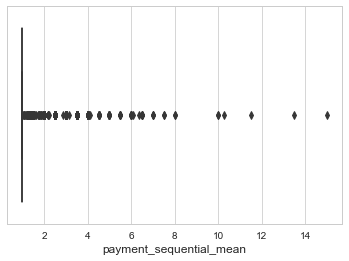

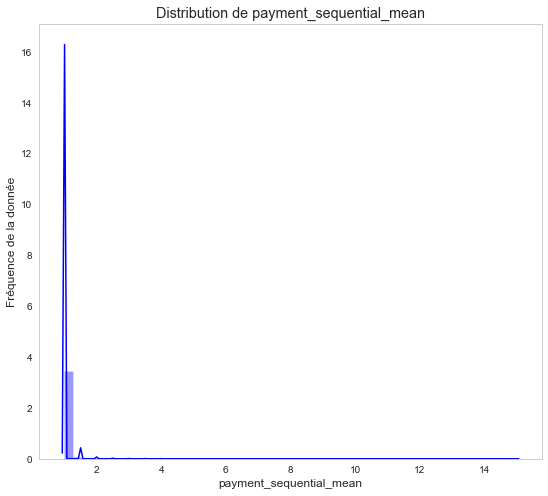

,Caractéristiques,Valeurs
0,count,93162.000000
1,mean,1.023313
2,std,0.193339
3,min,1.000000
4,25%,1.000000
5,50%,1.000000
6,75%,1.000000
7,max,15.000000
8,Skewness,2.828427
9,Kurtosis,7.999999


In [73]:
descrbibe_data(df_clean, 'payment_sequential_mean')

<a id='analyse'></a>
#### III.1.A.a) Variable : 'payment_installments'

c:\users\marj1\pycharmprojects\project5\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


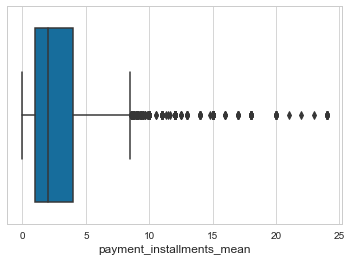

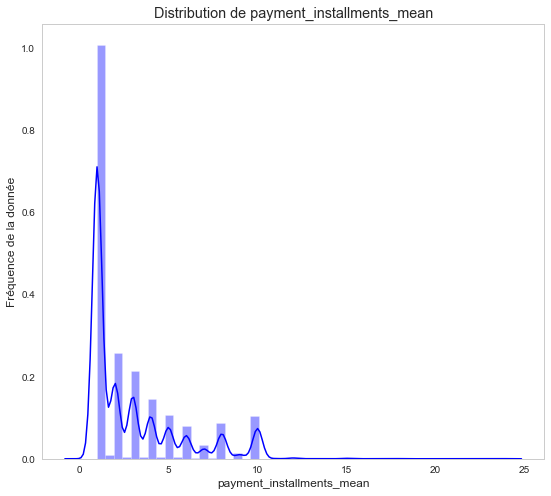

,Caractéristiques,Valeurs
0,count,93162.000000
1,mean,2.901165
2,std,2.678123
3,min,0.000000
4,25%,1.000000
5,50%,2.000000
6,75%,4.000000
7,max,24.000000
8,Skewness,2.828427
9,Kurtosis,7.999999


In [74]:
descrbibe_data(df_clean, 'payment_installments_mean')

<a id='analyse'></a>
#### III.1.A.a) Variable : payment_value

c:\users\marj1\pycharmprojects\project5\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


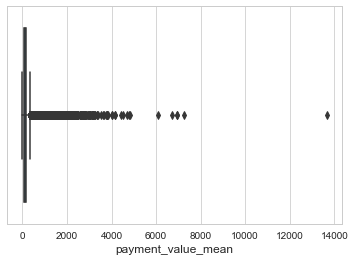

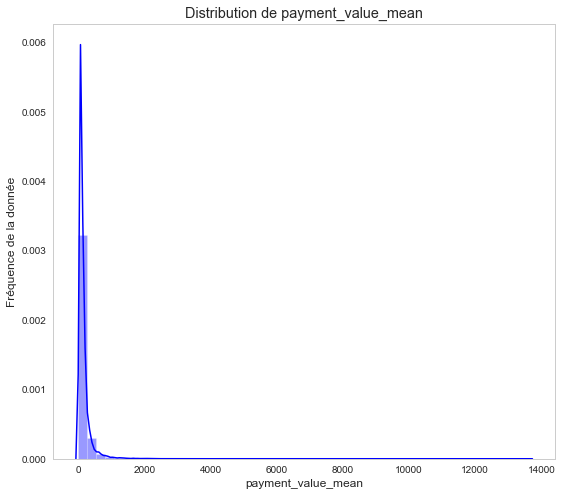

,Caractéristiques,Valeurs
0,count,93162.000000
1,mean,158.735697
2,std,219.860256
3,min,0.000000
4,25%,60.750000
5,50%,103.720000
6,75%,175.130000
7,max,13664.080000
8,Skewness,2.717720
9,Kurtosis,7.480723


In [75]:
descrbibe_data(df_clean, 'payment_value_mean')

<a id='analyse'></a>
#### III.1.A.a) Variable : review_score

c:\users\marj1\pycharmprojects\project5\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


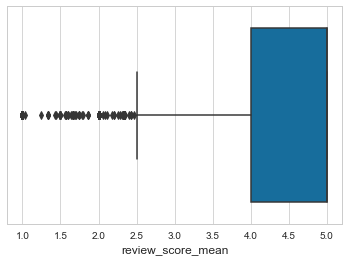

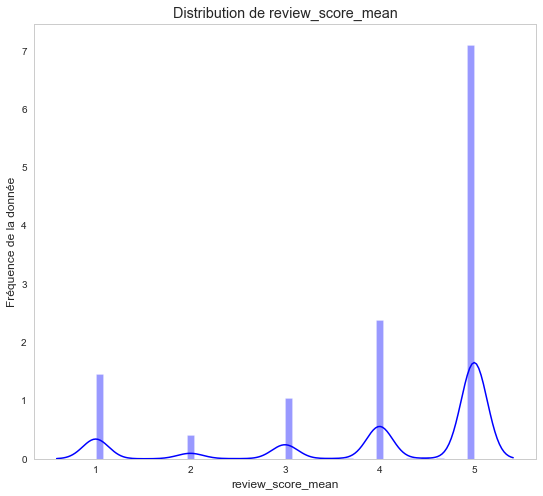

,Caractéristiques,Valeurs
0,count,93162.000000
1,mean,4.068449
2,std,1.354209
3,min,1.000000
4,25%,4.000000
5,50%,5.000000
6,75%,5.000000
7,max,5.000000
8,Skewness,2.828427
9,Kurtosis,8.000000


In [76]:
descrbibe_data(df_clean, 'review_score_mean')


<a id='analyse'></a>
#### III.1.A.a) Variable : price

c:\users\marj1\pycharmprojects\project5\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


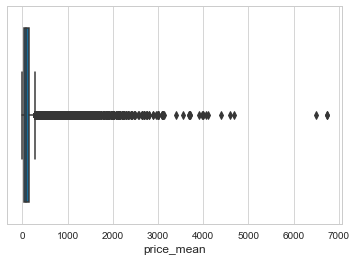

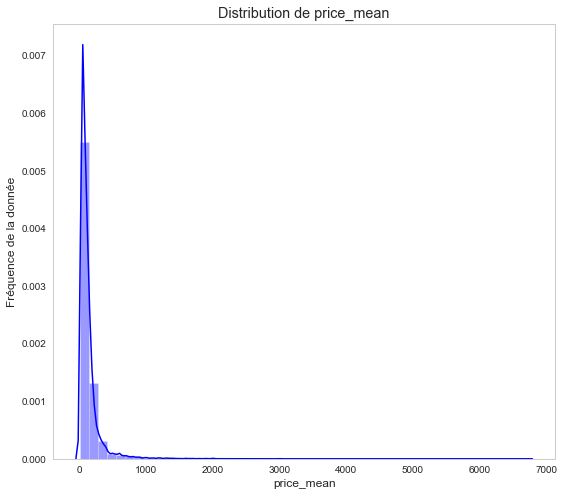

,Caractéristiques,Valeurs
0,count,93162.000000
1,mean,126.412558
2,std,190.864545
3,min,0.850000
4,25%,42.990000
5,50%,79.900000
6,75%,139.900000
7,max,6735.000000
8,Skewness,2.800803
9,Kurtosis,7.876567


In [77]:
descrbibe_data(df_clean, 'price_mean')

<a id='analyse'></a>
#### III.1.A.a) Variable : freight_value

c:\users\marj1\pycharmprojects\project5\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


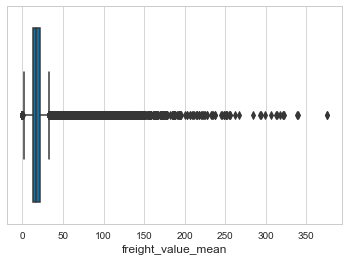

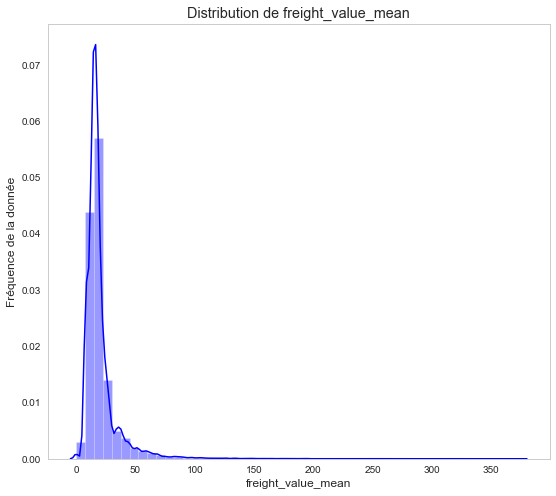

,Caractéristiques,Valeurs
0,count,93162.000000
1,mean,20.229665
2,std,15.731402
3,min,0.000000
4,25%,13.400000
5,50%,16.460000
6,75%,21.180000
7,max,375.280000
8,Skewness,2.828344
9,Kurtosis,7.999646


In [78]:
descrbibe_data(df_clean, 'freight_value_mean')

<a id='analyse'></a>
#### III.1.A.a) Variable : product_name_lenght

c:\users\marj1\pycharmprojects\project5\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


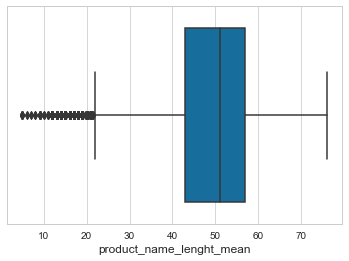

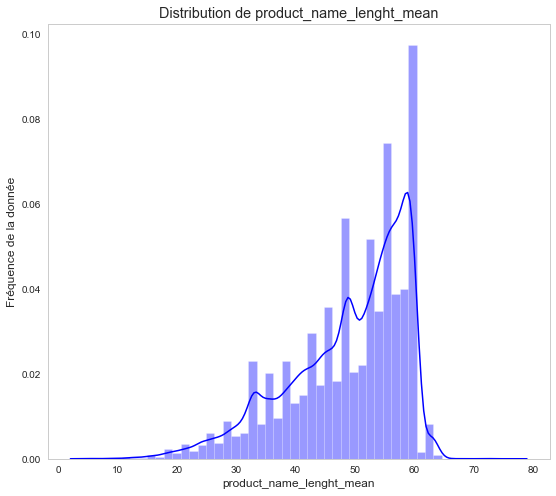

,Caractéristiques,Valeurs
0,count,93162.000000
1,mean,48.845084
2,std,9.805574
3,min,5.000000
4,25%,43.000000
5,50%,51.000000
6,75%,57.000000
7,max,76.000000
8,Skewness,2.828424
9,Kurtosis,7.999988


In [79]:
descrbibe_data(df_clean, 'product_name_lenght_mean')

<a id='analyse'></a>
#### III.1.A.a) Variable : product_description_lenght

c:\users\marj1\pycharmprojects\project5\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


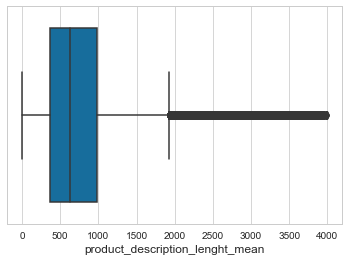

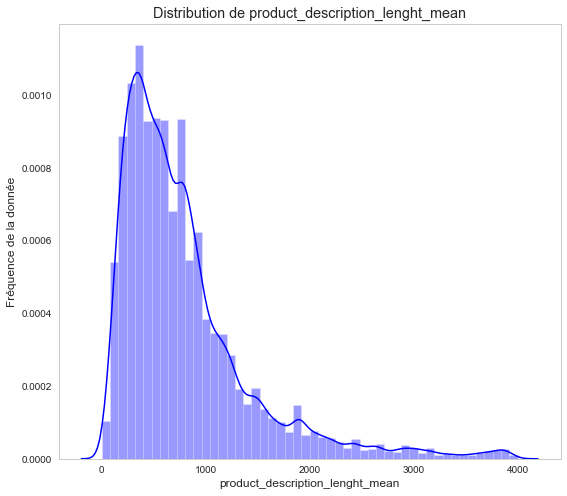

,Caractéristiques,Valeurs
0,count,93162.000000
1,mean,795.647045
2,std,644.195175
3,min,4.000000
4,25%,361.000000
5,50%,623.000000
6,75%,985.000000
7,max,3992.000000
8,Skewness,2.820464
9,Kurtosis,7.965364


In [80]:
descrbibe_data(df_clean, 'product_description_lenght_mean')

<a id='analyse'></a>
#### III.1.A.a) Variable : product_photos_qty

c:\users\marj1\pycharmprojects\project5\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


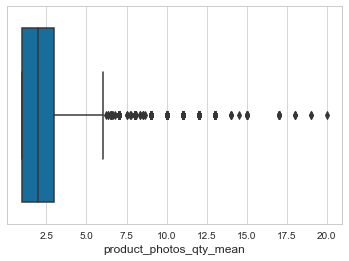

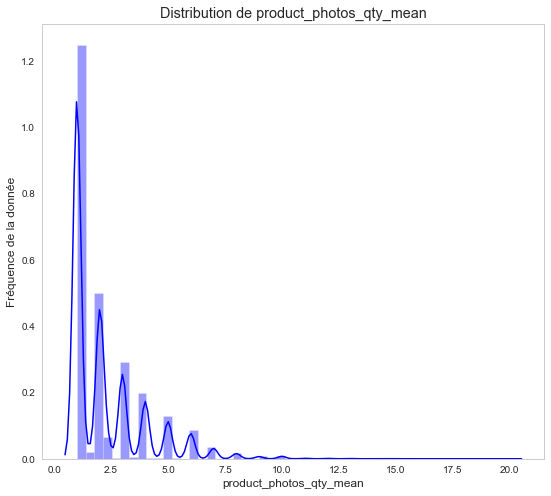

,Caractéristiques,Valeurs
0,count,93162.000000
1,mean,2.255916
2,std,1.719417
3,min,1.000000
4,25%,1.000000
5,50%,2.000000
6,75%,3.000000
7,max,20.000000
8,Skewness,2.828427
9,Kurtosis,7.999999


In [81]:
descrbibe_data(df_clean, 'product_photos_qty_mean')

<a id='analyse'></a>
#### III.1.A.a) Variable : product_weight_g

c:\users\marj1\pycharmprojects\project5\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


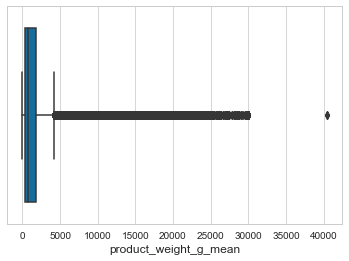

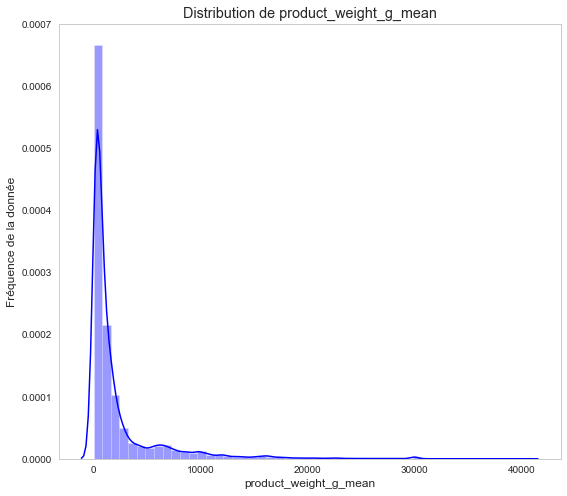

,Caractéristiques,Valeurs
0,count,93162.000000
1,mean,2109.401274
2,std,3735.593556
3,min,0.000000
4,25%,300.000000
5,50%,700.000000
6,75%,1850.000000
7,max,40425.000000
8,Skewness,2.114025
9,Kurtosis,4.196502


In [82]:
descrbibe_data(df_clean, 'product_weight_g_mean')

<a id='analyse'></a>
#### III.1.A.a) Variable : product_length_cm

c:\users\marj1\pycharmprojects\project5\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


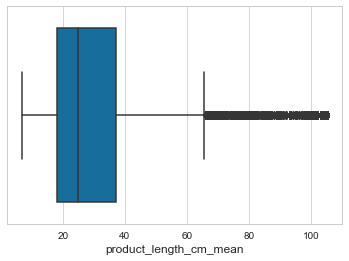

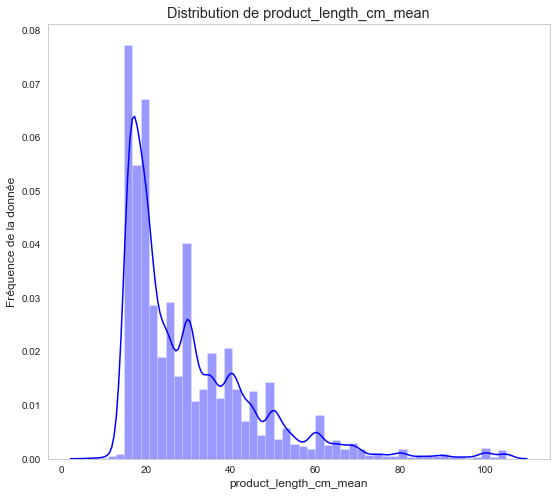

,Caractéristiques,Valeurs
0,count,93162.000000
1,mean,30.088836
2,std,15.932750
3,min,7.000000
4,25%,18.000000
5,50%,25.000000
6,75%,37.000000
7,max,105.000000
8,Skewness,2.828422
9,Kurtosis,7.999980


In [83]:
descrbibe_data(df_clean, 'product_length_cm_mean')

<a id='analyse'></a>
#### III.1.A.a) Variable : product_height_cm

c:\users\marj1\pycharmprojects\project5\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


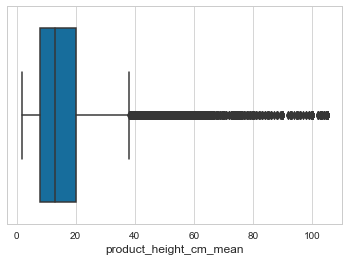

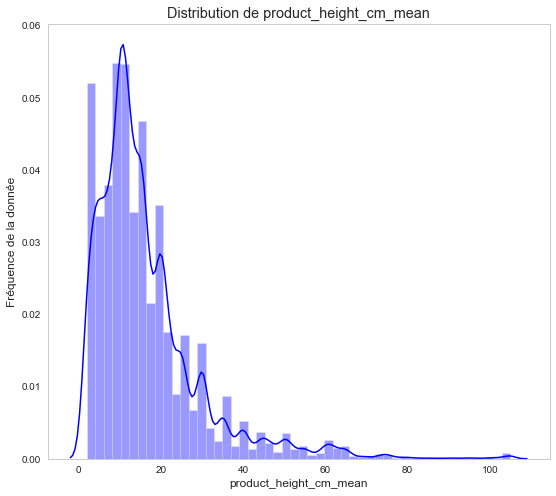

,Caractéristiques,Valeurs
0,count,93162.000000
1,mean,16.517514
2,std,13.203442
3,min,2.000000
4,25%,8.000000
5,50%,13.000000
6,75%,20.000000
7,max,105.000000
8,Skewness,2.828421
9,Kurtosis,7.999976


In [84]:
descrbibe_data(df_clean, 'product_height_cm_mean')

<a id='analyse'></a>
#### III.1.A.a) Variable : product_width_cm


In [85]:
df_clean.columns

Index(['customer_unique_id', 'frequency', 'customer_idcustomer_id',
       'customer_id', 'customer_city', 'customer_state', 'order_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_type', 'review_id',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date',
       'product_category_name', 'product_category_name_english',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'seller_geolocation_lat', 'seller_geolocation_lng',
       'seller_geolocation_city', 'seller_geolocation_state',
       'customer_geolocation_zip_code_prefix', 'customer_geolocation_lat',
       'customer_geolocation_lng', 'customer_geolocation_city',
       'customer_geolocation_state', 'recency_mean', 'payment_sequential_mean',
       'payment_installments_mean', 'payment_valu

c:\users\marj1\pycharmprojects\project5\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


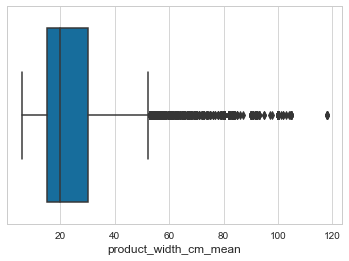

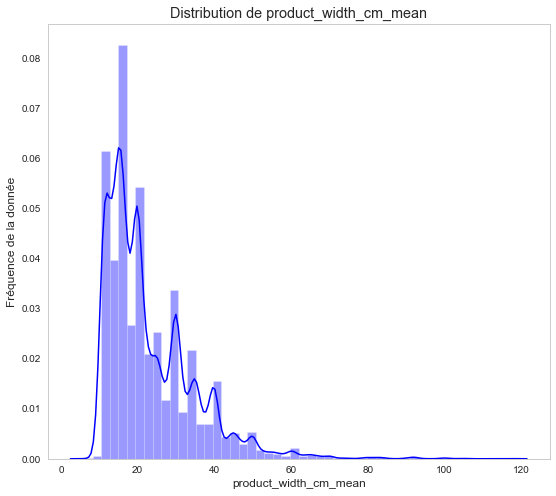

,Caractéristiques,Valeurs
0,count,93162.000000
1,mean,23.006964
2,std,11.595607
3,min,6.000000
4,25%,15.000000
5,50%,20.000000
6,75%,30.000000
7,max,118.000000
8,Skewness,2.828420
9,Kurtosis,7.999972


In [86]:
descrbibe_data(df_clean, 'product_width_cm_mean')

><font color = "green"><i> On remarque que le dataset contient
**product_length_cm**, **product_height_cm**, **product_width_cm**, ont peut donc calculer le volume du produit ***product_volume_cm3*** </i></font>

<a id='analyse'></a>
### III.1.B)Analyse des variables qualitatives

<a id='analyse'></a>
#### III.1.B.a) Variable: customer_state

<ipython-input-9-cf48e2b3c809>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, rotation='45', horizontalalignment="right")


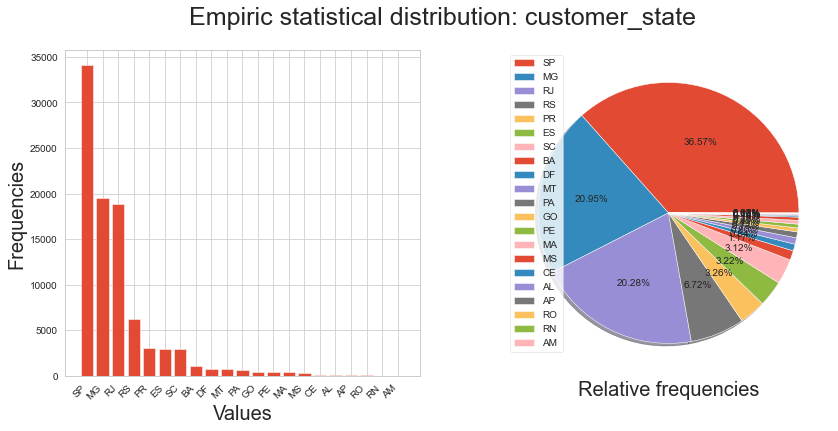

In [87]:
categorical_distribution(df_clean, 'customer_state')

><font color = "green"><i> On remarque que qu'il y a beacoups d'états ce qui risque de prendre beacoups de temps pour l'encodage

je vais donc creer une nouvelle variable pour la région ***customer_geolocation_region*** </i></font>


<a id='analyse'></a>
#### III.1.B.a) Variable: order_status

<ipython-input-9-cf48e2b3c809>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, rotation='45', horizontalalignment="right")


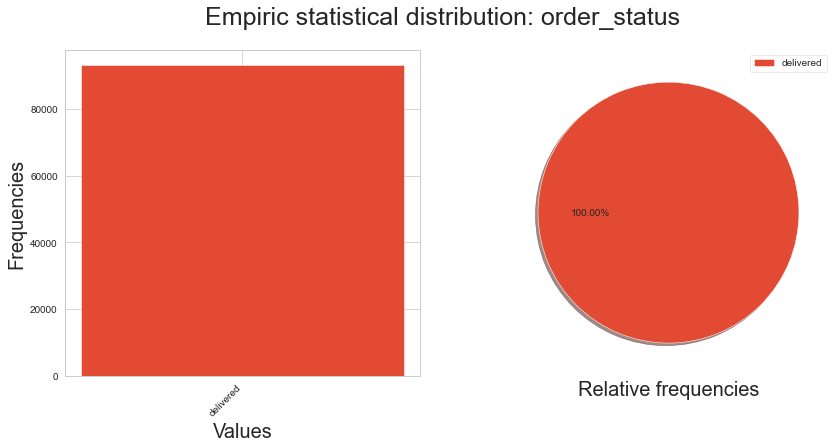

In [88]:


categorical_distribution(df_clean, 'order_status')
#toute les commandes ont été livrée
df_clean = df_clean.drop(columns = 'order_status')

<a id='analyse'></a>
#### III.1.B.a) Variable: payment_type

<ipython-input-9-cf48e2b3c809>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, rotation='45', horizontalalignment="right")


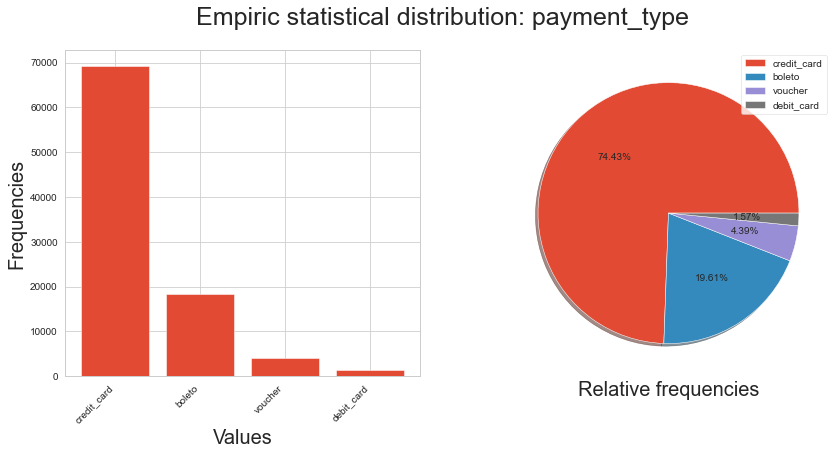

In [89]:
categorical_distribution(df_clean, 'payment_type')

<a id='analyse'></a>
#### III.1.B.a) Variable: product_category_name_english

<ipython-input-9-cf48e2b3c809>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, rotation='45', horizontalalignment="right")


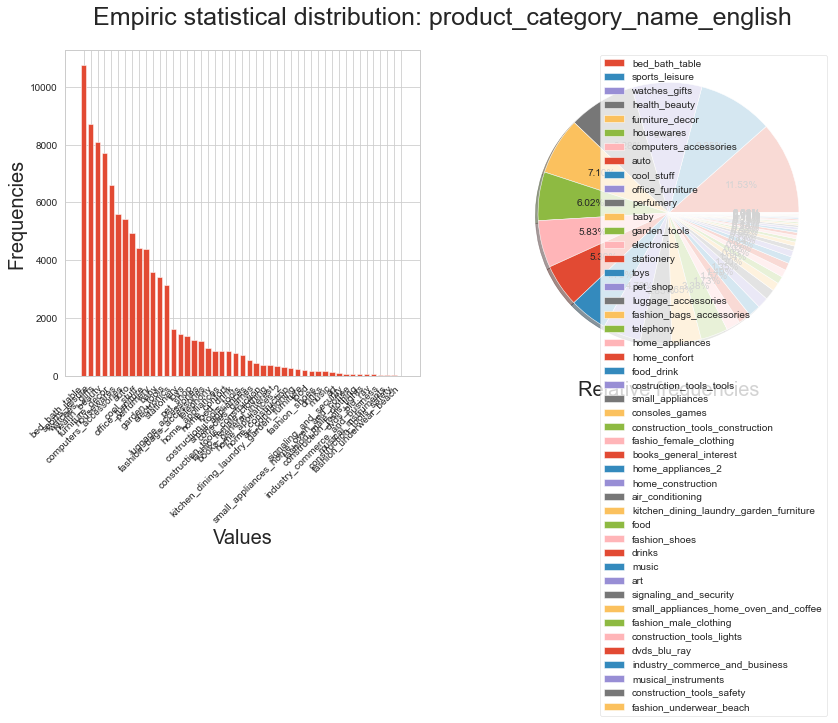

In [90]:
categorical_distribution(df_clean, 'product_category_name_english')

><font color = "green"><i> Product_category_name_english est une traduction de product_category_name Il n'y a donc aucun utilité
a garder cette feature</i></font>

><font color = "green"><i> Au vu du grand nombre de valeurs uniques une simplification de cette colonne s'impose ***product_simple_category_name_english*** </i></font>

<a id='analyse'></a>
#### III.1.B.a) Nouvelles Variable
distance_seller_customer_km
customer_geolocation_region
product_simple_category_name_english
product_volume_cm3
total_price

<a id='analyse'></a>
#### III.1.B.a) Variable: distance_seller_customer_km
><font color = "cyan"><i> Caclcul de la distance entre le vendeur et le client avec :
  **'customer_geolocation_lat'**,**'customer_geolocation_lng'**,**'seller_geolocation_lat'**,**'seller_geolocation_lng'**</i></font>

In [91]:
#df_clean['customer_geolocation_lat'] =df_clean['customer_geolocation_lat'].astype('float')
#df_clean['customer_geolocation_lng'] =df_clean['customer_geolocation_lng'].astype('float')
#df_clean['seller_geolocation_lat'] =df_clean['seller_geolocation_lat'].astype('float')
#df_clean['seller_geolocation_lng'] =df_clean['seller_geolocation_lng'].astype('float')


df_clean['distance_seller_customer_km']= df_clean['customer_geolocation_lat']
customer_geolocation = [
        df_clean['customer_geolocation_lat'].astype('float'),
        df_clean['customer_geolocation_lng'].astype('float')
    ]
seller_geolocation = [
        df_clean['seller_geolocation_lat'].astype('float'),
        df_clean['seller_geolocation_lng'].astype('float')
    ]

In [92]:
#def distance_from_coordinates(coord_A, coord_B):
def distance_from_coordinates(lat_A,lng_A,lat_B,lng_B):


    # Earth radius (in kilometers)
    R_earth = 6371
    # unpack coordinates in degrees
    #(lat_A, lng_A), (lat_B, lat_B) = coord_A, coord_B

    lat_A = numpy.radians(lat_A)
    lng_A = numpy.radians(lng_A)
    lat_B = numpy.radians(lat_B)
    lng_B = numpy.radians(lng_B)

    # angular distance (in radians), using spherical trigonometry relation
    S_ab = numpy.arccos(numpy.sin(lat_A)*numpy.sin(lat_B)
        + numpy.cos(lat_A)*numpy.cos(lat_B)*numpy.cos(lng_B-lng_A)
    )
    # distance (in kilometers)
    distance = S_ab*R_earth

    return distance


In [93]:
df_clean['distance_seller_customer_km']= \
    distance_from_coordinates(customer_geolocation[0].apply(lambda x: float(x)),customer_geolocation[1].apply(lambda x: float(x)),
                                                            seller_geolocation[0].apply(lambda x: float(x)),seller_geolocation[1].apply(lambda x: float(x)))

c:\users\marj1\pycharmprojects\project5\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


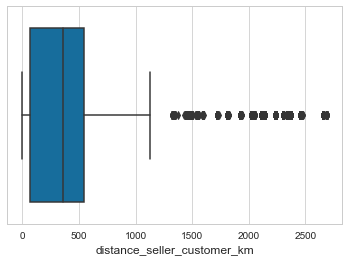

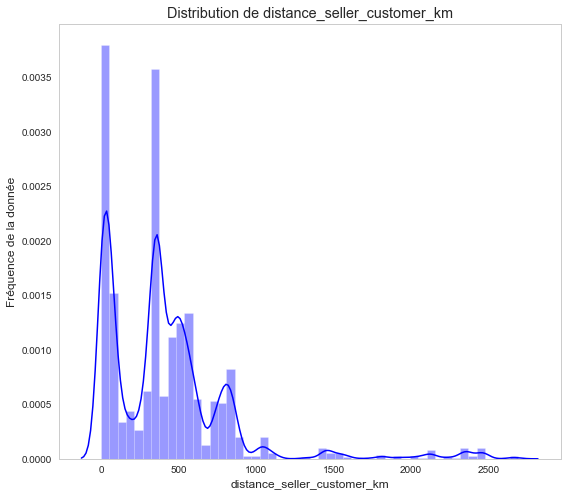

,Caractéristiques,Valeurs
0,count,93162.000000
1,mean,417.732880
2,std,415.545857
3,min,0.585938
4,25%,71.654273
5,50%,362.496741
6,75%,543.357379
7,max,2690.036882
8,Skewness,2.824607
9,Kurtosis,7.983502


In [94]:
descrbibe_data(df_clean, 'distance_seller_customer_km')

><font color = "green"><i> Je suis un commentaire </i></font>

In [95]:
#df_clean = df_clean.drop(columns = ['customer_geolocation_lat','customer_geolocation_lng','seller_geolocation_lat','seller_geolocation_lng'])

<a id='analyse'></a>
#### III.1.B.a) Variable: customer_geolocation_region
![alt text](https://p6.storage.canalblog.com/64/54/450014/29546120.gif)

In [96]:
df_clean['customer_geolocation_region'] = df_clean['customer_geolocation_state']
df_clean['customer_geolocation_region']= df_clean['customer_geolocation_region'].replace(['MT', 'GO', 'MS'] ,"Central")
df_clean['customer_geolocation_region']= df_clean['customer_geolocation_region'].replace(['MG', 'SP', 'ES', 'RJ','DF'] , 'Southeast')
df_clean['customer_geolocation_region']= df_clean['customer_geolocation_region'].replace(['PR', 'SC', 'RS'] , 'South')
df_clean['customer_geolocation_region']= df_clean['customer_geolocation_region'].replace(['MA', 'PI', 'BA', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE'] , 'Northeast')
df_clean['customer_geolocation_region']= df_clean['customer_geolocation_region'].replace(['AC', 'AM', 'RR', 'RO', 'PA', 'AP', 'TO'] , 'North')
df_clean['customer_geolocation_region']
df_clean['customer_geolocation_region'] = df_clean['customer_geolocation_region'].astype('category')

<ipython-input-9-cf48e2b3c809>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, rotation='45', horizontalalignment="right")


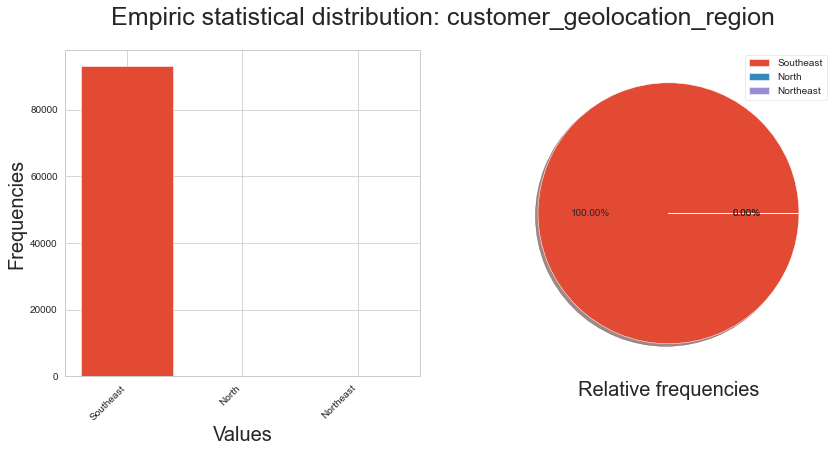

In [97]:
categorical_distribution(df_clean, 'customer_geolocation_region')

<a id='analyse'></a>
#### III.1.B.a) Variable: main_category

In [98]:
product_categories_dict = {
    'construction_tools_construction': 'construction',
    'construction_tools_lights': 'construction',
    'construction_tools_safety': 'construction',
    'costruction_tools_garden': 'construction',
    'costruction_tools_tools': 'construction',
    'garden_tools': 'construction',
    'home_construction': 'construction',

    'fashio_female_clothing': 'fashion',
    'fashion_bags_accessories': 'fashion',
    'fashion_childrens_clothes': 'fashion',
    'fashion_male_clothing': 'fashion',
    'fashion_shoes': 'fashion',
    'fashion_sport': 'fashion',
    'fashion_underwear_beach': 'fashion',

    'furniture_bedroom': 'furniture',
    'furniture_decor': 'furniture',
    'furniture_living_room': 'furniture',
    'furniture_mattress_and_upholstery': 'furniture',
    'bed_bath_table': 'furniture',
    'kitchen_dining_laundry_garden_furniture': 'furniture',
    'office_furniture': 'furniture',

    'home_appliances': 'home',
    'home_appliances_2': 'home',
    'home_comfort_2': 'home',
    'home_confort': 'home',
    'air_conditioning': 'home',
    'housewares': 'home',
    'art': 'home',
    'arts_and_craftmanship': 'home',
    'flowers': 'home',
    'cool_stuff': 'home',

    'drinks': 'food',
    'food': 'food',
    'food_drink': 'food',
    'la_cuisine': 'food',

    'electronics': 'multimedia',
    'audio': 'multimedia',
    'tablets_printing_image': 'multimedia',
    'telephony': 'multimedia',
    'fixed_telephony': 'multimedia',
    'small_appliances': 'multimedia',
    'small_appliances_home_oven_and_coffee': 'multimedia',
    'computers_accessories': 'multimedia',
    'computers': 'multimedia',

    'sports_leisure': 'leisure',
    'consoles_games': 'leisure',
    'musical_instruments': 'leisure',
    'toys': 'leisure',
    'cine_photo': 'leisure',
    'dvds_blu_ray': 'leisure',
    'cds_dvds_musicals': 'leisure',
    'music': 'leisure',
    'books_general_interest': 'leisure',
    'books_imported': 'leisure',
    'books_technical': 'leisure',

    'health_beauty': 'health_beauty',
    'perfumery': 'health_beauty',
    'diapers_and_hygiene': 'health_beauty',
    'baby': 'health_beauty',

    'christmas_supplies': 'supplies',
    'stationery': 'supplies',
    'party_supplies': 'supplies',
    'auto': 'supplies',
    'luggage_accessories': 'supplies',

    'watches_gifts': 'gifts',

    'agro_industry_and_commerce': 'misc',
    'industry_commerce_and_business': 'misc',
    'security_and_services': 'misc',
    'signaling_and_security': 'misc',
    'market_place': 'misc',
    'pet_shop': 'misc',
}
# Remap category to main category
df_clean['main_category'] = \
    df_clean['product_category_name_english']\
    .replace(product_categories_dict)

<ipython-input-9-cf48e2b3c809>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, rotation='45', horizontalalignment="right")


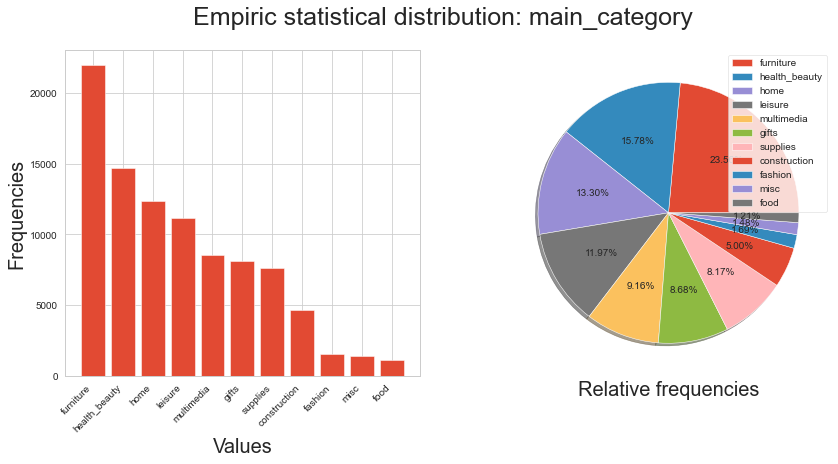

In [99]:
categorical_distribution(df_clean, 'main_category')

In [100]:
df_clean['main_category'] = df_clean['main_category'].astype('category')
df_clean = df_clean.drop(columns = ['product_category_name_english','product_category_name'])

<a id='analyse'></a>
#### III.1.B.a) Variable: product_volume_cm3

In [101]:
df_clean['product_volume_cm3'] = df_clean['product_height_cm_mean'] * df_clean['product_length_cm_mean']* df_clean['product_width_cm_mean']

#df_clean = df_clean.drop(columns = ['product_height_cm','product_length_cm','product_width_cm'])

c:\users\marj1\pycharmprojects\project5\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


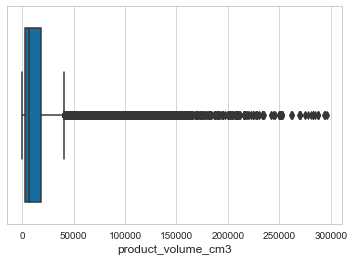

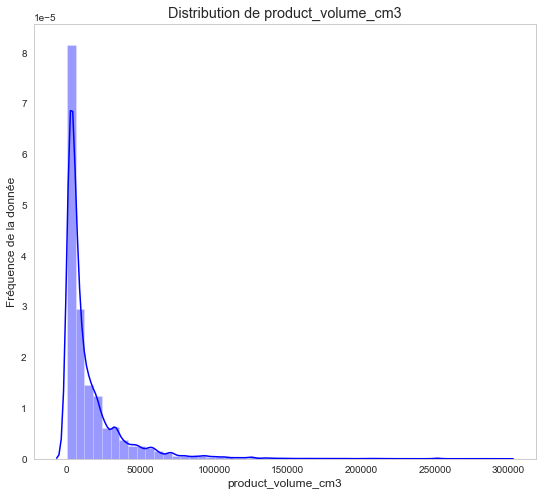

,Caractéristiques,Valeurs
0,count,93162.000000
1,mean,15200.114310
2,std,23255.204012
3,min,168.000000
4,25%,2856.000000
5,50%,6647.000000
6,75%,18000.000000
7,max,296208.000000
8,Skewness,2.411868
9,Kurtosis,5.941654


In [102]:
descrbibe_data(df_clean, 'product_volume_cm3')

<a id='analyse'></a>
#### III.1.B.a) Variable: total_price

In [103]:
df_clean['total_price'] = df_clean['price_mean'] + df_clean['freight_value_mean']

#df_clean = df_clean.drop(columns = ['price','freight_value'])

c:\users\marj1\pycharmprojects\project5\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


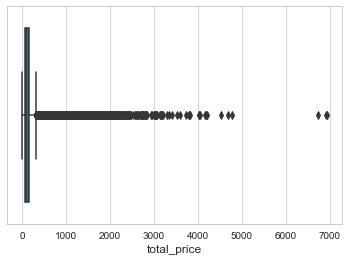

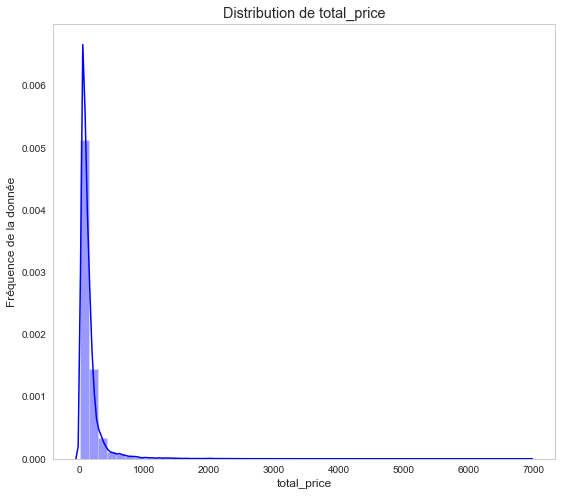

,Caractéristiques,Valeurs
0,count,93162.000000
1,mean,146.642224
2,std,198.130855
3,min,9.341429
4,25%,58.000000
5,50%,97.210000
6,75%,162.630000
7,max,6929.310000
8,Skewness,2.799306
9,Kurtosis,7.869702


In [104]:
descrbibe_data(df_clean, 'total_price')

<a id='analyse'></a>
#### III.1.B.a) Variable: late_delivery

In [105]:
df_clean["is_late_delivery"] = df_clean["order_delivered_customer_date"] > df_clean["order_estimated_delivery_date"]

df_clean["is_late_delivery"] = np.where(  df_clean["is_late_delivery"] == True , 1, df_clean["is_late_delivery"]  )
df_clean["is_late_delivery"] = np.where(  df_clean['is_late_delivery'] == False , 0, df_clean["is_late_delivery"]  )
df_clean["is_late_delivery"].astype(bool)


0        False
1        False
2        False
3        False
4        False
         ...  
96091    False
96092    False
96093    False
96094    False
96095    False
Name: is_late_delivery, Length: 93162, dtype: bool

In [106]:

get_type_and_missing_data(df_clean)



,colonne,Types,Effectif manquant,Effectif manquant %
0,customer_unique_id,object,0,0.0
1,frequency,float64,0,0.0
2,customer_idcustomer_id,object,0,0.0
3,customer_id,category,0,0.0
4,customer_city,object,0,0.0
5,customer_state,object,0,0.0
6,order_id,object,0,0.0
7,order_purchase_timestamp,datetime64[ns],0,0.0
8,order_approved_at,datetime64[ns],0,0.0
9,order_delivered_carrier_date,datetime64[ns],0,0.0


<a id='analyse'></a>
# III.1.B.a) Analyse multivarié

<a id='analyse'></a>
## III.1.B.a) Correl quantitative

In [107]:
df_num = df_clean.select_dtypes(include=['float', 'int32'])
df_corr_num_pearson = df_num.corr(method ='pearson')
df_corr_num_spearman = df_num.corr(method ='spearman')
df_corr_num_kendall = df_num.corr(method ='kendall')

c:\users\marj1\pycharmprojects\project5\env\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


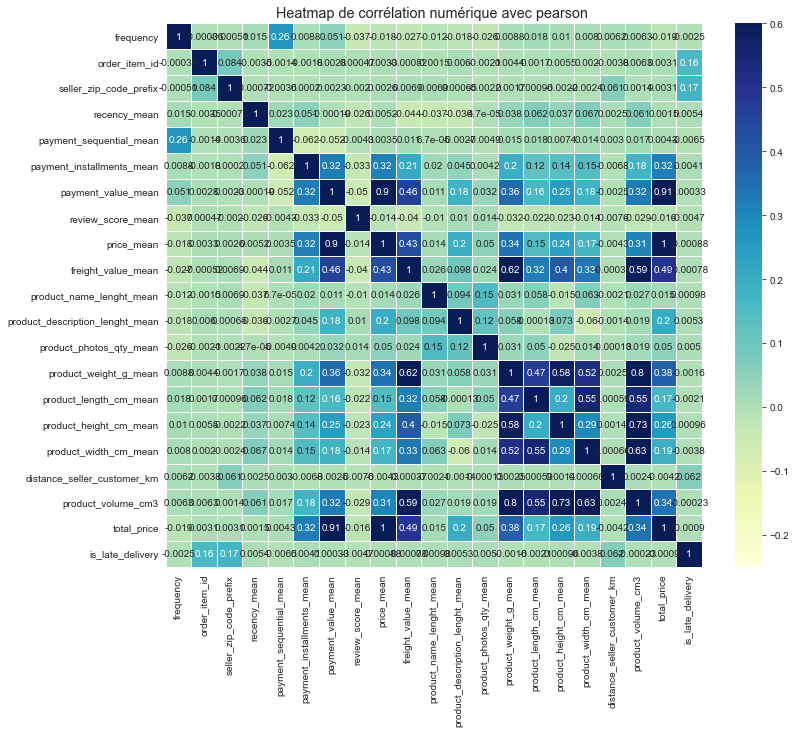

In [108]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr_num_pearson , cmap="YlGnBu",
            vmin=-0.25, annot=True, vmax=0.6, linewidths=.5)
plt.title('Heatmap de corrélation numérique avec pearson ')
plt.show()

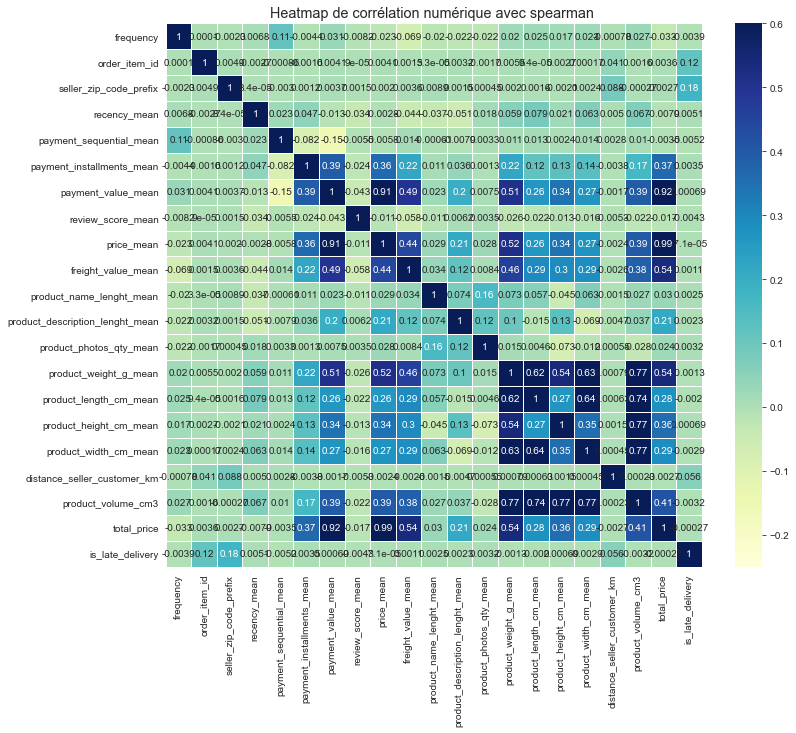

In [109]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr_num_spearman , cmap="YlGnBu",
            vmin=-0.25, annot=True, vmax=0.6, linewidths=.5)
plt.title('Heatmap de corrélation numérique avec spearman ')
plt.show()

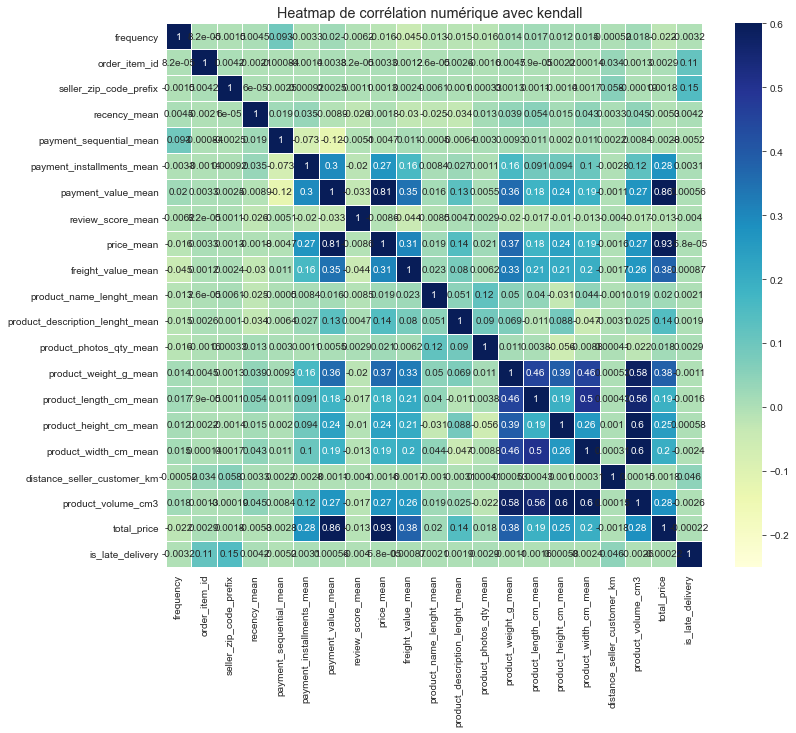

In [110]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr_num_kendall , cmap="YlGnBu",
            vmin=-0.25, annot=True, vmax=0.6, linewidths=.5)
plt.title('Heatmap de corrélation numérique avec kendall  ')
plt.show()

><font color = "cyan"><i> On ne garde pas les valeurs dont la corrélation >0.60
Supression de **payment_value** ,**product_weight_g**, </i></font>

In [111]:
df_clean = df_clean.drop(columns = ['price_mean','freight_value_mean','product_height_cm_mean',
                                    'product_length_cm_mean','product_width_cm_mean','customer_geolocation_lat',
                                    'customer_geolocation_lng','seller_geolocation_lat','seller_geolocation_lng',
                                    'payment_value_mean'])

<a id='analyse'></a>
## III.1.B.a) Correl qualitative

In [112]:
df_categ_full = df_clean.drop(columns=['customer_id','customer_unique_id',
                                  'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date',	'seller_geolocation_city',
'seller_geolocation_state','review_id','product_id','seller_id'])
df_categ = df_categ_full.select_dtypes(include=['category','bool'])

# on ne s'occupe pas du vendeur
df_categ = df_clean.drop(columns=['seller_city','seller_state'])



df_categ




on obtient donc


In [113]:
df_clean_num_cat= df_clean.drop(columns=['order_id','customer_id',
                                  'order_purchase_timestamp', 'order_approved_at',
                                  'order_delivered_carrier_date', 'order_delivered_customer_date',
                                  'order_estimated_delivery_date',	'seller_geolocation_city',
                                  'seller_geolocation_state','review_id',
                                  'product_id','seller_id','seller_city',
                                  'seller_state','customer_state','customer_city',
                                  'customer_geolocation_city','customer_geolocation_state',
                                  'product_weight_g_mean','review_creation_date',
                                    'review_answer_timestamp','shipping_limit_date',
                                  'product_name_lenght_mean','product_description_lenght_mean',
                                         'product_photos_qty_mean','seller_zip_code_prefix','customer_geolocation_zip_code_prefix',
                                         'is_late_delivery','order_item_id','customer_idcustomer_id'
                                         ])

In [114]:
df_clean_num_cat.columns

Index(['customer_unique_id', 'frequency', 'payment_type', 'recency_mean',
       'payment_sequential_mean', 'payment_installments_mean',
       'review_score_mean', 'distance_seller_customer_km',
       'customer_geolocation_region', 'main_category', 'product_volume_cm3',
       'total_price'],
      dtype='object')

In [115]:
df_clean_num_cat['payment_sequential_mean'].value_counts()

1.000000    90245
1.500000     2178
2.000000      340
2.500000       98
1.333333       74
            ...  
1.052023        1
1.428571        1
1.622869        1
1.398693        1
2.180851        1
Name: payment_sequential_mean, Length: 62, dtype: int64

In [116]:
df_clean_num_cat['payment_installments_mean'].value_counts()

1.000000    45068
2.000000    11466
3.000000     9534
4.000000     6467
5.000000     4750
            ...  
2.166667        1
9.111111        1
4.400000        1
9.264228        1
5.866044        1
Name: payment_installments_mean, Length: 268, dtype: int64

In [117]:
df_clean_num_cat
get_type_and_missing_data(df_clean_num_cat)

,colonne,Types,Effectif manquant,Effectif manquant %
0,customer_unique_id,object,0,0.0
1,frequency,float64,0,0.0
2,payment_type,object,0,0.0
3,recency_mean,float64,0,0.0
4,payment_sequential_mean,float64,0,0.0
5,payment_installments_mean,float64,0,0.0
6,review_score_mean,float64,0,0.0
7,distance_seller_customer_km,float64,0,0.0
8,customer_geolocation_region,category,0,0.0
9,main_category,category,0,0.0


In [118]:

df_clean_num_cat.to_pickle("data/df_clean_part1")

add time to dataset to analyse stability on customer_unique_id


In [119]:
df_full.columns

Index(['customer_unique_id', 'frequency', 'customer_idcustomer_id',
       'customer_id', 'customer_city', 'customer_state', 'order_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_type', 'review_id',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date',
       'product_category_name', 'product_category_name_english',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'seller_geolocation_lat', 'seller_geolocation_lng',
       'seller_geolocation_city', 'seller_geolocation_state',
       'customer_geolocation_zip_code_prefix', 'customer_geolocation_lat',
       'customer_geolocation_lng', 'customer_geolocation_city',
       'customer_geolocation_state', 'recency_mean', 'payment_sequential_mean',
       'payment_installments_mean', 'payment_valu

In [120]:
df_clean.columns
df_clean = df_clean.loc[:,~df_clean.columns.duplicated()]

In [121]:
df_clean = df_clean.drop(columns=['frequency', 'customer_idcustomer_id',
       'customer_id', 'customer_city', 'customer_state', 'order_id',
        'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date',
         'review_id',
       'review_creation_date', 'review_answer_timestamp',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',


       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'seller_geolocation_city', 'seller_geolocation_state',
       'customer_geolocation_zip_code_prefix', 'customer_geolocation_city',
       'customer_geolocation_state', 'recency_mean',
       'product_name_lenght_mean', 'product_description_lenght_mean',
       'product_photos_qty_mean', 'product_weight_g_mean',
       'main_category',
       'is_late_delivery'])

In [122]:
df_clean.columns

Index(['customer_unique_id', 'order_purchase_timestamp', 'payment_type',
       'payment_sequential_mean', 'payment_installments_mean',
       'review_score_mean', 'distance_seller_customer_km',
       'customer_geolocation_region', 'product_volume_cm3', 'total_price'],
      dtype='object')

In [123]:
df_clean


,customer_unique_id,order_purchase_timestamp,payment_type,payment_sequential_mean,payment_installments_mean,review_score_mean,distance_seller_customer_km,customer_geolocation_region,product_volume_cm3,total_price
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,credit_card,1.0,2.0,4.0,346.491931,Southeast,107136.0,146.87
1,290c77bc529b7ac935b93aa66c333dc3,2017-05-16 15:05:35,credit_card,1.0,8.0,5.0,347.800921,Southeast,53400.0,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,2017-05-16 15:05:35,credit_card,1.0,7.0,5.0,346.440279,Southeast,45968.0,157.73
3,259dac757896d24d7702b9acbbff3f3c,2017-05-16 15:05:35,credit_card,1.0,1.0,5.0,349.408210,Southeast,79968.0,173.30
4,345ecd01c38d18a9036ed96c73b8d066,2017-05-16 15:05:35,credit_card,1.0,8.0,5.0,345.410141,Southeast,23625.0,252.25
...,...,...,...,...,...,...,...,...,...,...
96091,1a29b476fee25c95fbafc67c5ac95cf8,2017-12-05 23:49:53,credit_card,1.0,6.0,4.0,368.133335,Southeast,11132.0,88.78
96092,d52a67c98be1cf6a5c84435bd38d095d,2017-12-05 23:49:53,credit_card,1.0,3.0,5.0,370.600934,Southeast,13200.0,129.06
96093,e9f50caf99f032f0bf3c55141f019d99,2017-12-05 23:49:53,credit_card,1.0,5.0,1.0,377.888773,Southeast,9000.0,56.04
96094,73c2643a0a458b49f58cea58833b192e,2017-12-05 23:49:53,credit_card,1.0,2.0,5.0,388.960615,Southeast,3458.0,711.07


In [124]:
df_clean['order_purchase_timestamp'] = df_clean['order_purchase_timestamp'].values.astype('int64')

In [125]:
df_clean.head(2)
get_type_and_missing_data(df_clean)

,colonne,Types,Effectif manquant,Effectif manquant %
0,customer_unique_id,object,0,0.0
1,order_purchase_timestamp,int64,0,0.0
2,payment_type,object,0,0.0
3,payment_sequential_mean,float64,0,0.0
4,payment_installments_mean,float64,0,0.0
5,review_score_mean,float64,0,0.0
6,distance_seller_customer_km,float64,0,0.0
7,customer_geolocation_region,category,0,0.0
8,product_volume_cm3,float64,0,0.0
9,total_price,float64,0,0.0


In [126]:
 
df_clean.to_csv("data/df_clean_part_time.csv", index=False)

In [127]:
data_customers = pd.read_pickle('data/df_clean_part1')
data_customers.head()
data_customers = data_customers.drop(columns={'customer_unique_id'})

# Inspect columns before deleting them
print("Number of features:", data_customers.shape[1])
data_customers.head(2)

Number of features: 11


,frequency,payment_type,recency_mean,payment_sequential_mean,payment_installments_mean,review_score_mean,distance_seller_customer_km,customer_geolocation_region,main_category,product_volume_cm3,total_price
0,147.0,credit_card,519.0,1.0,2.0,4.0,346.491931,Southeast,furniture,107136.0,146.87
1,178.0,credit_card,277.0,1.0,8.0,5.0,347.800921,Southeast,furniture,53400.0,335.48


In [128]:
data_customers.columns

Index(['frequency', 'payment_type', 'recency_mean', 'payment_sequential_mean',
       'payment_installments_mean', 'review_score_mean',
       'distance_seller_customer_km', 'customer_geolocation_region',
       'main_category', 'product_volume_cm3', 'total_price'],
      dtype='object')

In [129]:
df = data_customers



In [130]:
dummy_df = pd.get_dummies(data_customers)

dummy_df.head(2)

,frequency,recency_mean,payment_sequential_mean,payment_installments_mean,review_score_mean,distance_seller_customer_km,product_volume_cm3,total_price,payment_type_boleto,payment_type_credit_card,...,main_category_fashion,main_category_food,main_category_furniture,main_category_gifts,main_category_health_beauty,main_category_home,main_category_leisure,main_category_misc,main_category_multimedia,main_category_supplies
0,147.0,519.0,1.0,2.0,4.0,346.491931,107136.0,146.87,0,1,...,0,0,1,0,0,0,0,0,0,0
1,178.0,277.0,1.0,8.0,5.0,347.800921,53400.0,335.48,0,1,...,0,0,1,0,0,0,0,0,0,0


In [131]:
dummy_df.columns


Index(['frequency', 'recency_mean', 'payment_sequential_mean',
       'payment_installments_mean', 'review_score_mean',
       'distance_seller_customer_km', 'product_volume_cm3', 'total_price',
       'payment_type_boleto', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_type_voucher',
       'customer_geolocation_region_North',
       'customer_geolocation_region_Northeast',
       'customer_geolocation_region_Southeast', 'main_category_construction',
       'main_category_fashion', 'main_category_food',
       'main_category_furniture', 'main_category_gifts',
       'main_category_health_beauty', 'main_category_home',
       'main_category_leisure', 'main_category_misc',
       'main_category_multimedia', 'main_category_supplies'],
      dtype='object')

><font color = "green"><i> On garde les colonnes pertinantes  </i></font>

## Suppression des variables non-pertinentes

In [132]:
dummy_df.columns

Index(['frequency', 'recency_mean', 'payment_sequential_mean',
       'payment_installments_mean', 'review_score_mean',
       'distance_seller_customer_km', 'product_volume_cm3', 'total_price',
       'payment_type_boleto', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_type_voucher',
       'customer_geolocation_region_North',
       'customer_geolocation_region_Northeast',
       'customer_geolocation_region_Southeast', 'main_category_construction',
       'main_category_fashion', 'main_category_food',
       'main_category_furniture', 'main_category_gifts',
       'main_category_health_beauty', 'main_category_home',
       'main_category_leisure', 'main_category_misc',
       'main_category_multimedia', 'main_category_supplies'],
      dtype='object')

In [133]:
dummy_df = dummy_df.drop(columns=[
'payment_type_boleto','payment_type_debit_card','payment_type_voucher',
'customer_geolocation_region_North','customer_geolocation_region_Northeast','main_category_construction',
       'main_category_fashion', 'main_category_food',
       'main_category_furniture', 'main_category_gifts',
       'main_category_health_beauty', 'main_category_home',
       'main_category_leisure', 'main_category_misc',
       'main_category_multimedia', 'main_category_supplies',
        'frequency','recency_mean'])
dummy_df.head(2)

,payment_sequential_mean,payment_installments_mean,review_score_mean,distance_seller_customer_km,product_volume_cm3,total_price,payment_type_credit_card,customer_geolocation_region_Southeast
0,1.0,2.0,4.0,346.491931,107136.0,146.87,1,1
1,1.0,8.0,5.0,347.800921,53400.0,335.48,1,1


In [134]:
dummy_df.to_csv("data\cleaned_p5_data.csv", index=False)
dummy_df

## **Pré-traitement** (centrage et réduction)

In [135]:
std_scaler = StandardScaler()
data_customers_std = dummy_df.copy()
data_customers_std.iloc[:, :] = std_scaler.fit_transform(dummy_df)

In [136]:
# Display final results
display(data_customers_std.head())

,payment_sequential_mean,payment_installments_mean,review_score_mean,distance_seller_customer_km,product_volume_cm3,total_price,payment_type_credit_card,customer_geolocation_region_Southeast
0,-0.12058,-0.336493,-0.050546,-0.171440,3.953368,0.001150,0.586052,0.004633
1,-0.12058,1.903894,0.687897,-0.168290,1.642647,0.953101,0.586052,0.004633
2,-0.12058,1.530496,0.687897,-0.171565,1.323061,0.055962,0.586052,0.004633
3,-0.12058,-0.709891,0.687897,-0.164422,2.785107,0.134547,0.586052,0.004633
4,-0.12058,1.903894,0.687897,-0.174044,0.362282,0.533023,0.586052,0.004633


## **Sauvegarde** des données clients standardisées

In [137]:
data_customers_std.describe()

,payment_sequential_mean,payment_installments_mean,review_score_mean,distance_seller_customer_km,product_volume_cm3,total_price,payment_type_credit_card,customer_geolocation_region_Southeast
count,9.316200e+04,9.316200e+04,9.316200e+04,9.316200e+04,9.316200e+04,9.316200e+04,9.316200e+04,9.316200e+04
mean,8.190591e-16,-7.161714e-17,3.279592e-17,8.542194e-18,1.078452e-16,-2.175209e-16,1.891486e-16,-2.596617e-15
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.205798e-01,-1.083289e+00,-2.265873e+00,-1.003858e+00,-6.464013e-01,-6.929841e-01,-1.706334e+00,-2.158240e+02
25%,-1.205798e-01,-7.098911e-01,-5.054592e-02,-8.328334e-01,-5.308137e-01,-4.473947e-01,-1.706334e+00,4.633405e-03
50%,-1.205798e-01,-3.364932e-01,6.878965e-01,-1.329250e-01,-3.677955e-01,-2.494941e-01,5.860517e-01,4.633405e-03
75%,-1.205798e-01,4.103027e-01,6.878965e-01,3.023136e-01,1.203989e-01,8.069345e-02,5.860517e-01,4.633405e-03
max,7.229150e+01,7.878261e+00,6.878965e-01,5.468268e+00,1.208372e+01,3.423346e+01,5.860517e-01,4.633405e-03


In [138]:
# Save the file (text type)
data_customers_std.to_csv("data\cleaned_p5_data_std.csv", index=False)

In [139]:
main.get_type_and_missing_data(data_customers_std)

,colonne,Types,Effectif manquant,Effectif manquant %
0,payment_sequential_mean,float64,0,0.0
1,payment_installments_mean,float64,0,0.0
2,review_score_mean,float64,0,0.0
3,distance_seller_customer_km,float64,0,0.0
4,product_volume_cm3,float64,0,0.0
5,total_price,float64,0,0.0
6,payment_type_credit_card,float64,0,0.0
7,customer_geolocation_region_Southeast,float64,0,0.0


# **Réduction dimensionnelle** par ACP
Pour faciliter le traitement des données par les algorithmes de clustering et lutter contre "*la malédiction de la dimensionnalité*", nous procédons à une réduction dimensionnelle préalable.

## Eboulis des valeurs propres

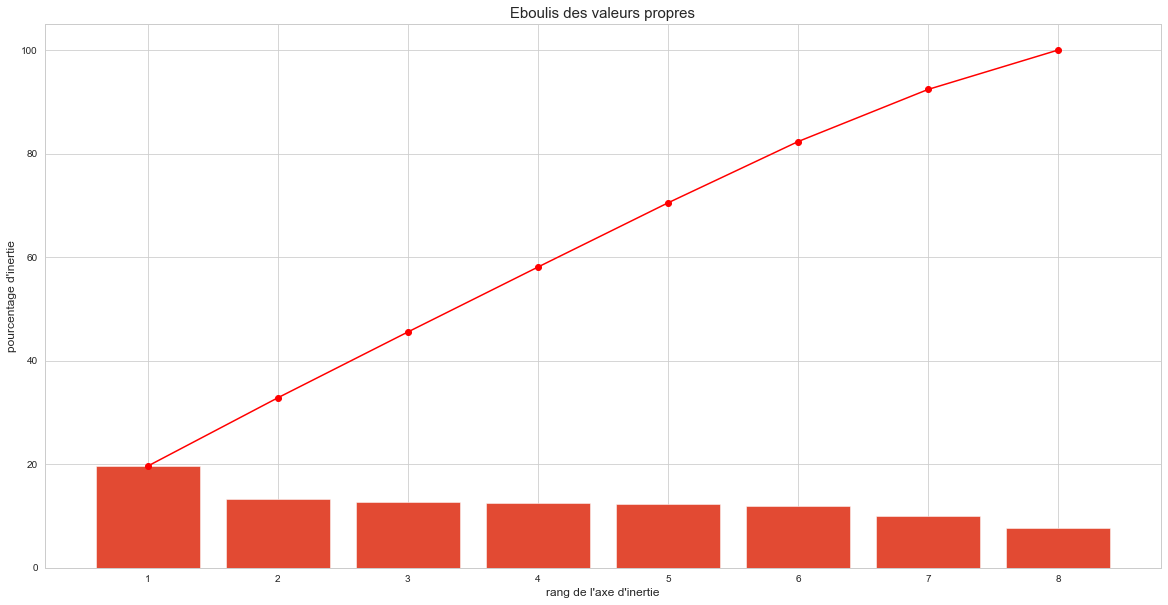

In [140]:
# Scree plot
main.display_scree_plot(data_customers_std)

## Projection sur les axes d'inertie jusqu'à 90% de variance

In [141]:


# Proceed to features reduction, up to 90% of variance
data_PCA = main.PCA_features_reduction(
    data_customers_std,
    var_threshold=0.9
)

# Convert to pd.DataFrame and set columns names
col_names = ["PCA_F{}".format(i) for i in range(1, data_PCA.shape[1]+1)]
data_PCA = pd.DataFrame(data_PCA, columns=col_names)

# Display resulting DataFrame
display(data_PCA.head(2))

# Save the file (text type)
data_PCA.to_csv("data\cleaned_p5_data_PCA.csv", index=False)

Initial number of features: 8
Number of selected features: 7
Cumulative explained variance:  92.39%


,PCA_F1,PCA_F2,PCA_F3,PCA_F4,PCA_F5,PCA_F6,PCA_F7
0,2.010400,0.375303,0.609940,-0.138825,0.238363,-0.377894,-2.878553
1,2.486432,0.130351,-0.308329,-0.467694,0.728458,-0.462415,0.215830
